In [ ]:
# Data 670 Data Analytics
# Errol Ian Ave Acosta
# Professor Henry Saleeb
# Assignment 3 Data Exploration/Preparation/Cleaning
# July 1, 2025

# Version: SMOTE, VIF, AND DC applied

NOTE: UPLOAD DATASET/S (DRAG & DROP) MANUALLY INTO GOOGLE COLAB PLATFORM BEFORE THE START OF EVERY SESSION!!!

In [ ]:
# Load Libraries and Install Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# EAA

In [ ]:
# Load Datasets "Name it a simpler name for easy processing = pd.read_csv ('/content/xxx.csv)"
# Load the E-Commerce dataset
ec = pd.read_csv('/content/ec.csv')
# Load the FMCG dataset
fmcg = pd.read_csv('/content/fmgc.csv')
# Preview the first few rows of each

# NOTE REMEMBER THIS FOUNDATION WHEN TROUBLESHOOTING

# EAA

In [ ]:
# 1. Check basic structure and column names
print("E-Commerce shape:", ec.shape)
print("FMCG shape:", fmcg.shape)

print("\nE-Commerce columns:", ec.columns.tolist())
print("FMCG columns:", fmcg.columns.tolist())

# EAA

E-Commerce shape: (10999, 12)
FMCG shape: (25000, 24)

E-Commerce columns: ['orderid', 'warehouseblock', 'shipmentmode', 'carecalls', 'rating', 'productcost', 'priorpurchases', 'importance', 'gender', 'discount', 'weightgms', 'latedelivery']
FMCG columns: ['warehouseid', 'managerid', 'location', 'capacity', 'zone', 'region', 'refillreq', 'transportissues', 'competitors', 'retailshops', 'ownertype', 'distributors', 'floodimpact', 'floodproof', 'electricsupply', 'hubdistance', 'workers', 'estyear', 'storageissues', 'tempregulator', 'govtcert', 'breakdowns', 'govtchecks', 'productweight']


In [ ]:
# 2. Preview the first few rows
print("\nE-Commerce Preview:")
print(ec.head())

print("\nFMCG Preview:")
print(fmcg.head())

# EAA


E-Commerce Preview:
   orderid warehouseblock shipmentmode  carecalls  rating  productcost  \
0        1              D       Flight          4       2          177   
1        2              F       Flight          4       5          216   
2        3              A       Flight          2       2          183   
3        4              B       Flight          3       3          176   
4        5              C       Flight          2       2          184   

   priorpurchases importance gender  discount  weightgms  latedelivery  
0               3        low      F        44       1233             1  
1               2        low      M        59       3088             1  
2               4        low      M        48       3374             1  
3               4     medium      M        10       1177             1  
4               3     medium      F        46       2484             1  

FMCG Preview:
  warehouseid  managerid location capacity   zone  region  refillreq  \
0   WH_10

In [ ]:
# 3. Check for missing values
print("\nMissing values in E-Commerce:")
print(ec.isna().sum())

print("\nMissing values in FMCG:")
print(fmcg.isna().sum())

# EAA


Missing values in E-Commerce:
orderid           0
warehouseblock    0
shipmentmode      0
carecalls         0
rating            0
productcost       0
priorpurchases    0
importance        0
gender            0
discount          0
weightgms         0
latedelivery      0
dtype: int64

Missing values in FMCG:
warehouseid            0
managerid              0
location               0
capacity               0
zone                   0
region                 0
refillreq              0
transportissues        0
competitors            0
retailshops            0
ownertype              0
distributors           0
floodimpact            0
floodproof             0
electricsupply         0
hubdistance            0
workers              990
estyear            11881
storageissues          0
tempregulator          0
govtcert             908
breakdowns             0
govtchecks             0
productweight          0
dtype: int64


In [ ]:
# 4. Check data types
print("\nE-Commerce Data Types:")
print(ec.dtypes)

print("\nFMCG Data Types:")
print(fmcg.dtypes)

"""
int64 = 64-bit integer (numeric data type used for whole numbers) [no decimals]
Object = A general-purpose type used in pandas for text, mixed types, or anything that isn't clearly numeric.
"""
# EAA


E-Commerce Data Types:
orderid            int64
warehouseblock    object
shipmentmode      object
carecalls          int64
rating             int64
productcost        int64
priorpurchases     int64
importance        object
gender            object
discount           int64
weightgms          int64
latedelivery       int64
dtype: object

FMCG Data Types:
warehouseid         object
managerid           object
location            object
capacity            object
zone                object
region              object
refillreq            int64
transportissues      int64
competitors          int64
retailshops          int64
ownertype           object
distributors         int64
floodimpact          int64
floodproof           int64
electricsupply       int64
hubdistance          int64
workers            float64
estyear            float64
storageissues        int64
tempregulator        int64
govtcert            object
breakdowns           int64
govtchecks           int64
productweight        in

In [ ]:
# 5. Get summary statistics for numeric columns
print("\nE-Commerce Summary Stats:")
print(ec.describe())

print("\nFMCG Summary Stats:")
print(fmcg.describe())

"""

# 🔢 Summary Statistics Quick Notes

# ✅ Mean (Average)
# - Measures central tendency.
# - Sensitive to outliers.
# - Useful when data is symmetrically distributed.

# ✅ Standard Deviation (STD)
# - Measures spread or variability of data.
# - High std = data is widely spread.
# - Low std = data is tightly clustered around mean.

# ✅ Minimum (Min)
# - Smallest value in the dataset.
# - Helps detect errors or lower bounds.
# - Useful for setting thresholds.

# ✅ Maximum (Max)
# - Largest value in the dataset.
# - Can reveal outliers or upper limits.
# - Useful in normalization or risk analysis.

# 🧠 As a Data Scientist:
# - Use mean & std to understand normal behavior.
# - Use min & max to catch anomalies.
# - Always check these before modeling!

"""

# EAA


E-Commerce Summary Stats:
           orderid     carecalls        rating   productcost  priorpurchases  \
count  10999.00000  10999.000000  10999.000000  10999.000000    10999.000000   
mean    5500.00000      4.054459      2.990545    210.196836        3.567597   
std     3175.28214      1.141490      1.413603     48.063272        1.522860   
min        1.00000      2.000000      1.000000     96.000000        2.000000   
25%     2750.50000      3.000000      2.000000    169.000000        3.000000   
50%     5500.00000      4.000000      3.000000    214.000000        3.000000   
75%     8249.50000      5.000000      4.000000    251.000000        4.000000   
max    10999.00000      7.000000      5.000000    310.000000       10.000000   

           discount     weightgms  latedelivery  
count  10999.000000  10999.000000  10999.000000  
mean      13.373216   3634.016729      0.596691  
std       16.205527   1635.377251      0.490584  
min        1.000000   1001.000000      0.000000  
25

'\n\n# 🔢 Summary Statistics Quick Notes\n\n# ✅ Mean (Average)\n# - Measures central tendency.\n# - Sensitive to outliers.\n# - Useful when data is symmetrically distributed.\n\n# ✅ Standard Deviation (STD)\n# - Measures spread or variability of data.\n# - High std = data is widely spread.\n# - Low std = data is tightly clustered around mean.\n\n# ✅ Minimum (Min)\n# - Smallest value in the dataset.\n# - Helps detect errors or lower bounds.\n# - Useful for setting thresholds.\n\n# ✅ Maximum (Max)\n# - Largest value in the dataset.\n# - Can reveal outliers or upper limits.\n# - Useful in normalization or risk analysis.\n\n# 🧠 As a Data Scientist:\n# - Use mean & std to understand normal behavior.\n# - Use min & max to catch anomalies.\n# - Always check these before modeling!\n\n'

In [ ]:
# 6. Get summary for categorical/text columns
print("\nE-Commerce Categorical Summary:")
print(ec.describe(include='object'))

print("\nFMCG Categorical Summary:")
print(fmcg.describe(include='object'))

# EAA


E-Commerce Categorical Summary:
       warehouseblock shipmentmode importance gender
count           10999        10999      10999  10999
unique              5            3          3      2
top                 F         Ship        low      F
freq             3666         7462       5297   5545

FMCG Categorical Summary:
       warehouseid  managerid location capacity   zone  region      ownertype  \
count        25000      25000    25000    25000  25000   25000          25000   
unique       25000      25000        2        3      4       6              2   
top      WH_124999  EID_74999    Rural    Large  North  Zone 6  Company Owned   
freq             1          1    22957    10169  10278    8339          13578   

       govtcert  
count     24092  
unique        5  
top           C  
freq       5501  


In [ ]:
# 8. Check for duplicate rows
print("\nDuplicate rows in E-Commerce:", ec.duplicated().sum())
print("Duplicate rows in FMCG:", fmcg.duplicated().sum())

# EAA


Duplicate rows in E-Commerce: 0
Duplicate rows in FMCG: 0


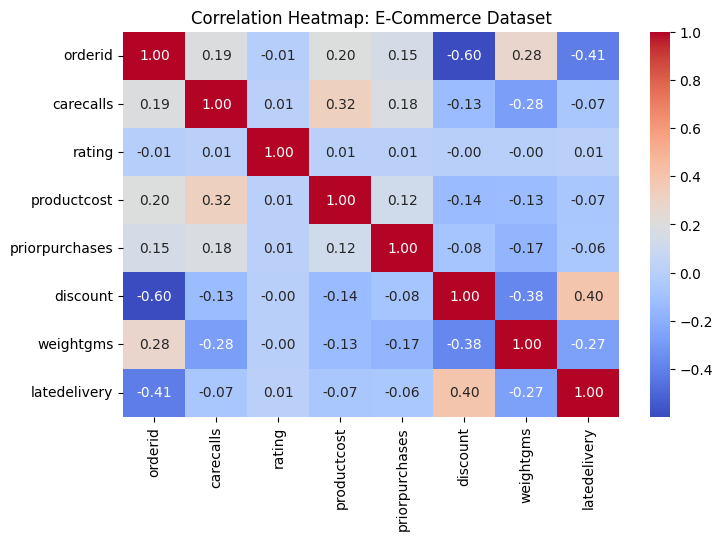

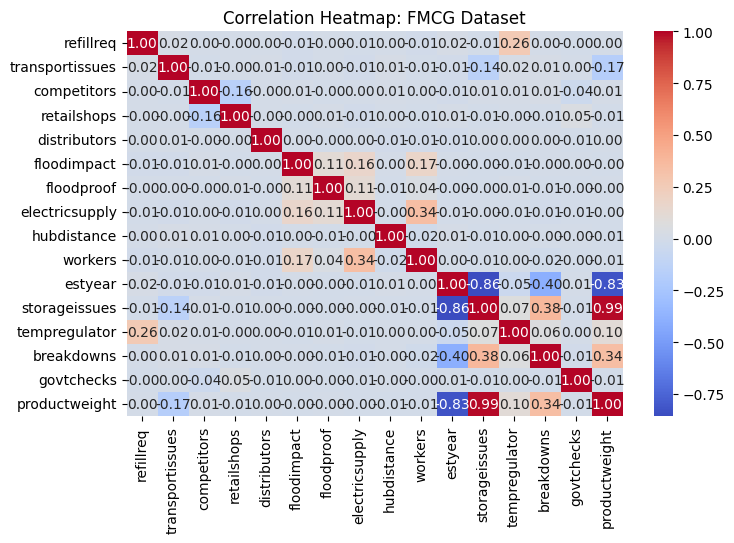

In [ ]:
# Generate heatmaps for correlation matrices of numerical columns in each dataset

# 🔹 Select only numerical columns for correlation heatmaps
ec_numeric = ec.select_dtypes(include=np.number)
fmcg_numeric = fmcg.select_dtypes(include=np.number)

# 🔹 Create correlation matrices
corr_ec = ec_numeric.corr()
corr_fmcg = fmcg_numeric.corr()

# 🔹 Plotting the E-Commerce correlation heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(corr_ec, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: E-Commerce Dataset')
plt.show()

# 🔹 Plotting the FMCG correlation heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(corr_fmcg, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: FMCG Dataset')
plt.show()

# EAA

# CONDUCT MERGE / MAPPING BELOW HERE!
```



Outer Join on Cleaned Keys + Merge Key Creation
block_region_map = {
    'a': 'zone 1',
    'b': 'zone 2',
    'c': 'zone 3',
    'd': 'zone 4',
    'f': 'zone 5'
}

# Clean and map
ec['warehouseblock'] = ec['warehouseblock'].astype(str).str.strip().str.lower()
ec['region'] = ec['warehouseblock'].map(block_region_map)

# Also clean FMCG regions
fmgc['region'] = fmgc['region'].astype(str).str.strip().str.lower()

# Aggregate FMCG by region
fmgc_agg = fmgc.groupby('region').mean().reset_index()

# Merge on region
merged_df = pd.merge(ec, fmgc_agg, on='region', how='left')

ZONE 6 will be excluded as it has not matching regions!

In [ ]:
# prompt: I want to map both datasets this way block_region_map = {
#     'a': 'zone 1',
#     'b': 'zone 2',
#     'c': 'zone 3',
#     'd': 'zone 4',
#     'f': 'zone 5'
# }
# # Clean and map
# ec['warehouseblock'] = ec['warehouseblock'].astype(str).str.strip().str.lower()
# ec['region'] = ec['warehouseblock'].map(block_region_map)
# # Also clean FMCG regions
# fmgc['region'] = fmgc['region'].astype(str).str.strip().str.lower()
# # Aggregate FMCG by region
# fmgc_agg = fmgc.groupby('region').mean().reset_index()
# # Merge on region
# merged_df = pd.merge(ec, fmgc_agg, on='region', how='left')


# Outer Join on Cleaned Keys + Merge Key Creation
block_region_map = {
    'a': 'zone 1',
    'b': 'zone 2',
    'c': 'zone 3',
    'd': 'zone 4',
    'f': 'zone 5'
}

# Clean and map
ec['warehouseblock'] = ec['warehouseblock'].astype(str).str.strip().str.lower()
ec['region'] = ec['warehouseblock'].map(block_region_map)

# Also clean FMCG regions
fmcg['region'] = fmcg['region'].astype(str).str.strip().str.lower()

# Aggregate FMCG by region
# Ensure only numeric columns are aggregated to avoid errors with non-numeric types after cleaning
fmcg_numeric_cols = fmcg.select_dtypes(include=np.number).columns.tolist()
# Add 'region' to the list of columns to include in groupby
fmcg_cols_to_agg = ['region'] + fmcg_numeric_cols

# Filter the fmcg DataFrame to include only relevant columns for aggregation
fmcg_for_agg = fmcg[fmcg_cols_to_agg]

fmcg_agg = fmcg_for_agg.groupby('region').mean().reset_index()

# Merge on region
merged_df = pd.merge(ec, fmcg_agg, on='region', how='left')

# Display the first few rows of the merged DataFrame
print("\nMerged DataFrame Preview:")
print(merged_df.head())

# Check the shape and columns of the merged DataFrame
print("\nMerged DataFrame shape:", merged_df.shape)
print("Merged DataFrame columns:", merged_df.columns.tolist())

# Check for missing values in the merged DataFrame
print("\nMissing values in Merged DataFrame:")
print(merged_df.isna().sum())

# EAA


Merged DataFrame Preview:
   orderid warehouseblock shipmentmode  carecalls  rating  productcost  \
0        1              d       Flight          4       2          177   
1        2              f       Flight          4       5          216   
2        3              a       Flight          2       2          183   
3        4              b       Flight          3       3          176   
4        5              c       Flight          2       2          184   

   priorpurchases importance gender  discount  ...  floodproof  \
0               3        low      F        44  ...    0.058190   
1               2        low      M        59  ...    0.054938   
2               4        low      M        48  ...    0.046738   
3               4     medium      M        10  ...    0.050962   
4               3     medium      F        46  ...    0.060049   

   electricsupply hubdistance    workers      estyear  storageissues  \
0        0.645594  164.709770  28.688950  2009.415440      

In [ ]:
# Check if any EC rows have missing values after the merge
missing_region_rows = ec[ec['region'].isna()]
print("Rows in EC with no region mapping:", len(missing_region_rows))

# If that returns 0 → you're perfectly safe to continue.

# EAA

Rows in EC with no region mapping: 0


CONFIRM ALL VARIABLES FROM BOTH DATASETS ARE PRESENT!!!

In [ ]:
# Get the list of columns from the original dataframes
ec_cols = set(ec.columns)
fmcg_cols = set(fmcg.columns)
merged_cols = set(merged_df.columns)

# Check if all columns from ec are in the merged dataframe
ec_cols_in_merged = ec_cols.issubset(merged_cols)
print(f"\nAre all original E-Commerce columns present in the merged dataframe? {ec_cols_in_merged}")

# Find which original ec columns are missing in the merged dataframe if any
missing_ec_cols = list(ec_cols - merged_cols)
if missing_ec_cols:
    print(f"Missing E-Commerce columns in merged dataframe: {missing_ec_cols}")

# Check if all columns from fmcg are in the merged dataframe (excluding the aggregated ones
# as their names might have changed or they were numerical)
# The merge added columns from fmcg_agg, which only contains 'region' and numeric columns
# that were averaged. So we expect the original FMCG columns (especially non-numeric ones
# that weren't aggregated) NOT to be directly in the merged_df, EXCEPT for 'region'.
# Instead, we should check if the columns from fmcg_agg are in the merged dataframe.
fmcg_agg_cols = set(fmcg_agg.columns)
fmcg_agg_cols_in_merged = fmcg_agg_cols.issubset(merged_cols)
print(f"Are all aggregated FMCG columns present in the merged dataframe? {fmcg_agg_cols_in_merged}")

# Find which aggregated fmcg columns are missing in the merged dataframe if any
missing_fmcg_agg_cols = list(fmcg_agg_cols - merged_cols)
if missing_fmcg_agg_cols:
    print(f"Missing aggregated FMCG columns in merged dataframe: {missing_fmcg_agg_cols}")

# Note: This validation confirms that the columns used for merging (from ec and the aggregated fmcg)
# are present in the final merged dataframe. It does NOT mean that ALL original columns
# from both datasets are directly present. For example, if a column in fmcg was not numeric
# and not 'region', it won't appear in fmcg_agg or the final merged_df.

# EAA


Are all original E-Commerce columns present in the merged dataframe? True
Are all aggregated FMCG columns present in the merged dataframe? True


In [ ]:
# prompt: remove orderid

# remove orderid column
if 'orderid' in merged_df.columns:
    merged_df = merged_df.drop('orderid', axis=1)
else:
    print("Column 'orderid' not found in DataFrame.")

print("\nMerged DataFrame columns after attempting to drop orderid:", merged_df.columns.tolist())

# EAA


Merged DataFrame columns after attempting to drop orderid: ['warehouseblock', 'shipmentmode', 'carecalls', 'rating', 'productcost', 'priorpurchases', 'importance', 'gender', 'discount', 'weightgms', 'latedelivery', 'region', 'refillreq', 'transportissues', 'competitors', 'retailshops', 'distributors', 'floodimpact', 'floodproof', 'electricsupply', 'hubdistance', 'workers', 'estyear', 'storageissues', 'tempregulator', 'breakdowns', 'govtchecks', 'productweight']



Visualizing skewness of numerical features:


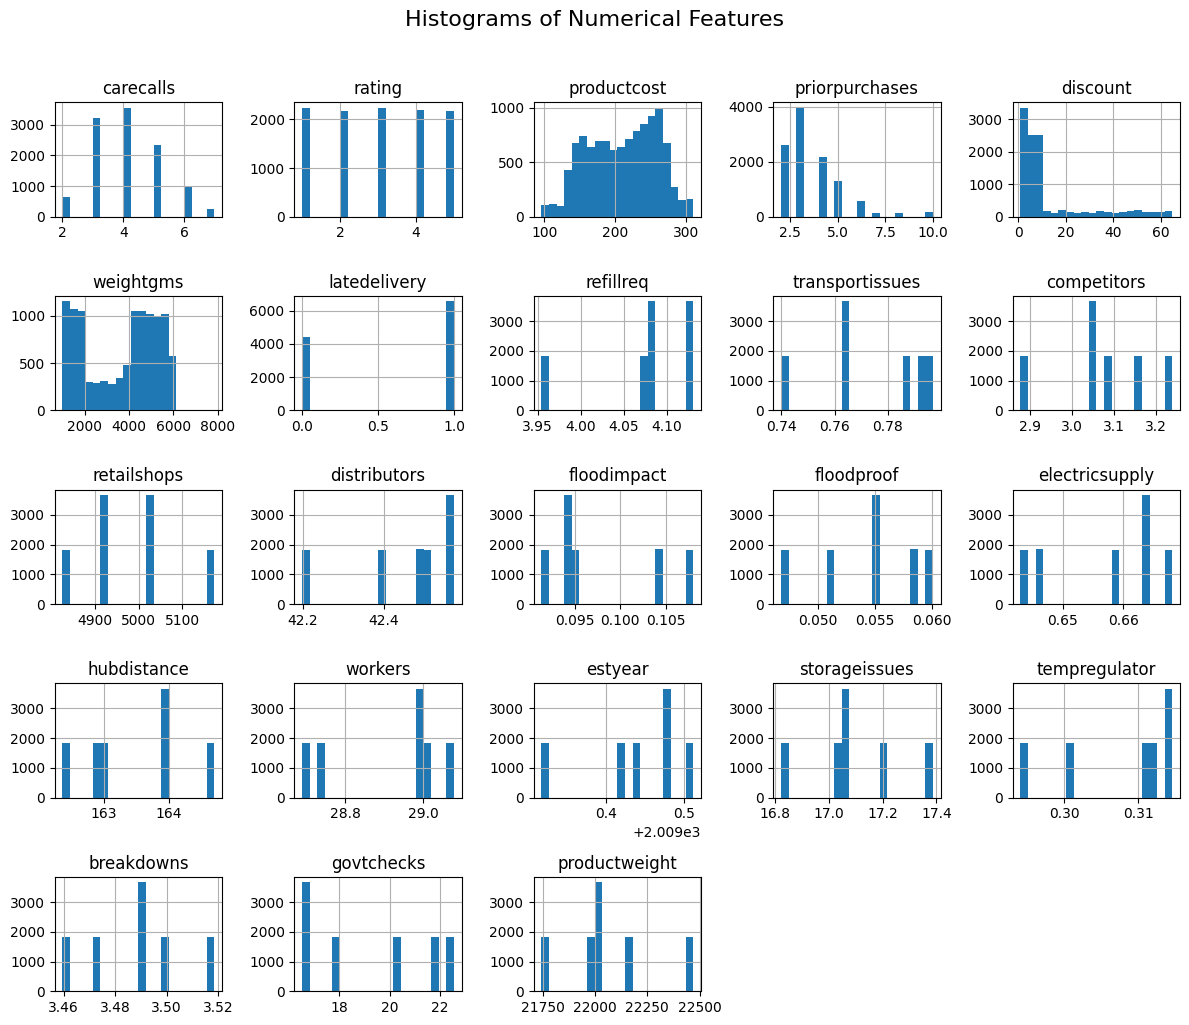


Skewness of numerical features:
carecalls          0.391926
rating             0.004360
productcost       -0.157117
priorpurchases     1.681897
discount           1.798929
weightgms         -0.249747
latedelivery      -0.394257
refillreq         -1.253716
transportissues   -0.386859
competitors       -0.347807
retailshops        0.387386
distributors      -1.053035
floodimpact        0.693885
floodproof        -0.426407
electricsupply    -0.461670
hubdistance        0.088128
workers           -0.591027
estyear           -0.930345
storageissues      0.164823
tempregulator     -0.802249
breakdowns         0.038143
govtchecks         0.139885
productweight      0.494286
dtype: float64


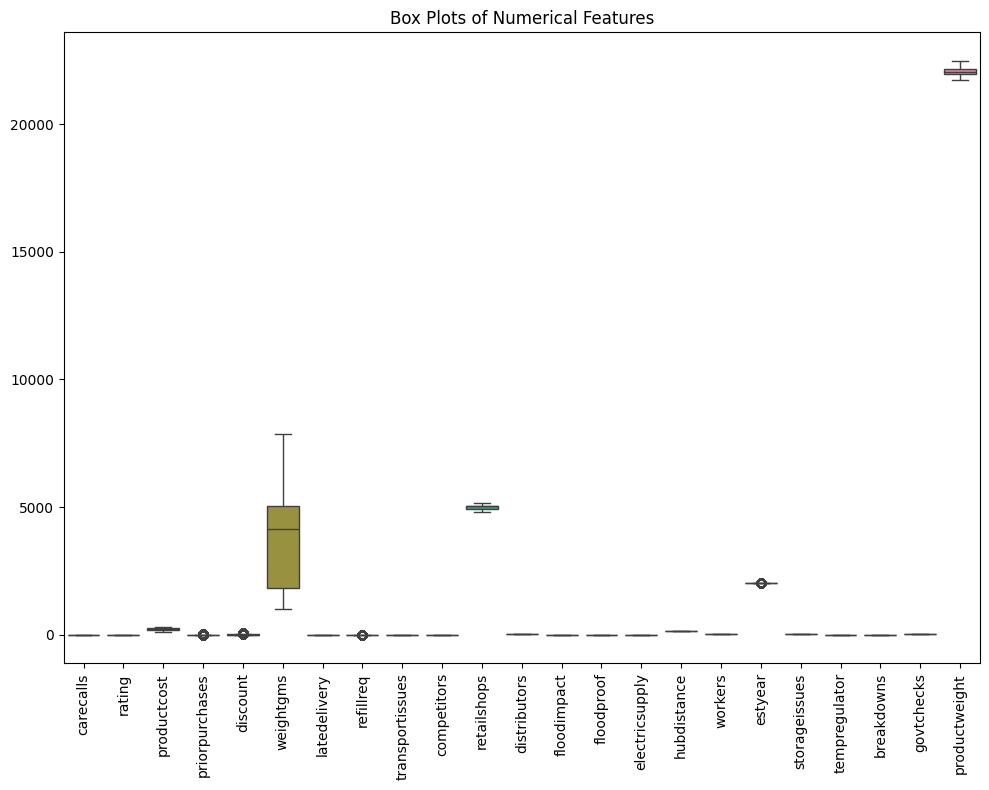

In [ ]:
# prompt: feature skew visualization

import matplotlib.pyplot as plt
import numpy as np
# Visualize the distribution and skewness of numerical features
print("\nVisualizing skewness of numerical features:")

# Select only numerical columns from the merged DataFrame
merged_numeric = merged_df.select_dtypes(include=np.number)

# Plot histograms for each numerical feature
merged_numeric.hist(figsize=(12, 10), bins=20)
plt.suptitle('Histograms of Numerical Features', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

# Calculate and print skewness for each numerical feature
skewness = merged_numeric.skew()
print("\nSkewness of numerical features:")
print(skewness)

# Optional: Visualize using box plots to see outliers and distribution spread
plt.figure(figsize=(10, 8))
sns.boxplot(data=merged_numeric)
plt.title('Box Plots of Numerical Features')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# EAA

In [ ]:
# heatmap

# Select numerical columns from the merged DataFrame
merged_numeric = merged_df.select_dtypes(include=np.number)

# Create the correlation matrix for the merged DataFrame
corr_merged = merged_numeric.corr()

# Plotting the merged DataFrame correlation heatmap
plt.figure(figsize=(15, 10)) # Adjust figure size as needed
sns.heatmap(corr_merged, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Merged Dataset')
plt.show()

# EAA

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np

# Assuming merged_df is your feature set and 'latedelivery' is the target
X = merged_df.drop('latedelivery', axis=1)

# Handle categorical features by one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Check for and handle infinite values (if any were introduced, e.g., from division by zero)
# Replace infinite values with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Impute missing values that might have been created by replacing infinities
# Using mean imputation as a simple strategy, can be adjusted if needed
for col in X.columns:
    if X[col].isnull().any():
        mean_val = X[col].mean()
        X[col].fillna(mean_val, inplace=True)

# Ensure all columns are numeric before calculating VIF
# This step is crucial as VIF requires numerical input
X_numeric = X.select_dtypes(include=np.number)

# Drop any non-numeric columns from X if they exist after get_dummies and imputation
# (shouldn't happen with get_dummies, but as a safeguard)
X = X[X_numeric.columns]

# Recalculate VIF for each feature using the cleaned numeric data
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns  # Use columns from the one-hot encoded and cleaned X
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\nVIF Data:")
print(vif_data)

# EAA

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)



VIF Data:
            feature       VIF
0         carecalls  1.260107
1            rating  1.000475
2       productcost  1.144116
3    priorpurchases  1.070530
4          discount  1.294860
5         weightgms  1.383356
6         refillreq       inf
7   transportissues       inf
8       competitors       inf
9       retailshops       inf
10     distributors       inf
11      floodimpact       inf
12       floodproof       inf
13   electricsupply       inf
14      hubdistance       inf
15          workers       inf
16          estyear       inf
17    storageissues       inf
18    tempregulator       inf
19       breakdowns       inf
20       govtchecks       inf
21    productweight       inf


In [ ]:
# Prompt: Drop multicollinear columns based on VIF and correlation analysis

# List of columns to drop
cols_to_drop = [
    'storageissues',
    'govtchecks',
    'breakdowns',
    'floodproof',
    'estyear'
]

# Drop columns from the merged DataFrame
merged_df = merged_df.drop(columns=cols_to_drop)

# Display updated shape and columns
print("Updated DataFrame shape:", merged_df.shape)
print("Remaining columns:", merged_df.columns.tolist())

# EAA

Updated DataFrame shape: (10999, 23)
Remaining columns: ['warehouseblock', 'shipmentmode', 'carecalls', 'rating', 'productcost', 'priorpurchases', 'importance', 'gender', 'discount', 'weightgms', 'latedelivery', 'region', 'refillreq', 'transportissues', 'competitors', 'retailshops', 'distributors', 'floodimpact', 'electricsupply', 'hubdistance', 'workers', 'tempregulator', 'productweight']


Create ONE ADDITIONAL FEATURE!`

In [ ]:
# Create ONE ADDITIONAL FEATURE!

# Create additional feature: delivery_pressure
merged_df['delivery_pressure'] = merged_df['carecalls'] / (merged_df['productcost'] + 1)

# EAA


In [ ]:
# One-hot encode
X = pd.get_dummies(merged_df.drop('latedelivery', axis=1), drop_first=True)
y = merged_df['latedelivery']

# Proceed with SMOTE, splitting, and modeling

# EAA


In [ ]:
print(merged_df['delivery_pressure'].describe())

# EAA

count    10999.000000
mean         0.019967
std          0.006645
min          0.006431
25%          0.015385
50%          0.019231
75%          0.023121
max          0.060606
Name: delivery_pressure, dtype: float64


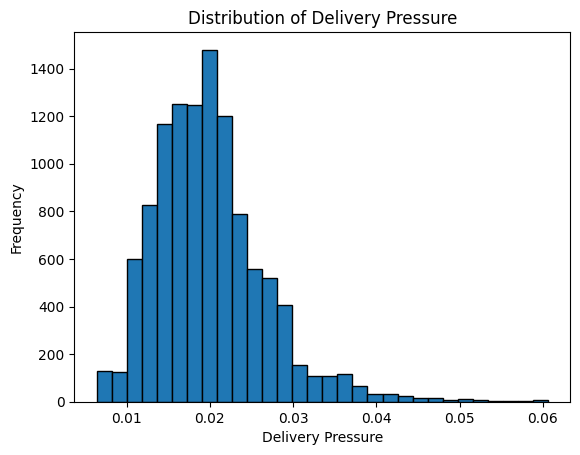

In [ ]:
import matplotlib.pyplot as plt
plt.hist(merged_df['delivery_pressure'], bins=30, edgecolor='black')
plt.title('Distribution of Delivery Pressure')
plt.xlabel('Delivery Pressure')
plt.ylabel('Frequency')
plt.show()

# EAA

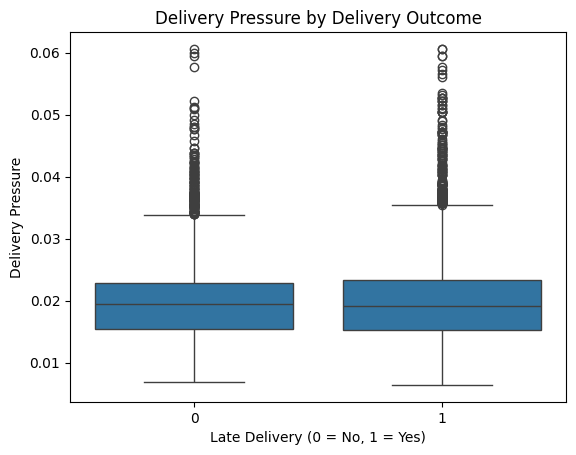

In [ ]:
import seaborn as sns
sns.boxplot(x=merged_df['latedelivery'], y=merged_df['delivery_pressure'])
plt.title('Delivery Pressure by Delivery Outcome')
plt.xlabel('Late Delivery (0 = No, 1 = Yes)')
plt.ylabel('Delivery Pressure')
plt.show()

# EAA

In [ ]:
corr = merged_df[['delivery_pressure', 'latedelivery']].corr()
print(corr)

# EAA

                   delivery_pressure  latedelivery
delivery_pressure           1.000000      0.002802
latedelivery                0.002802      1.000000


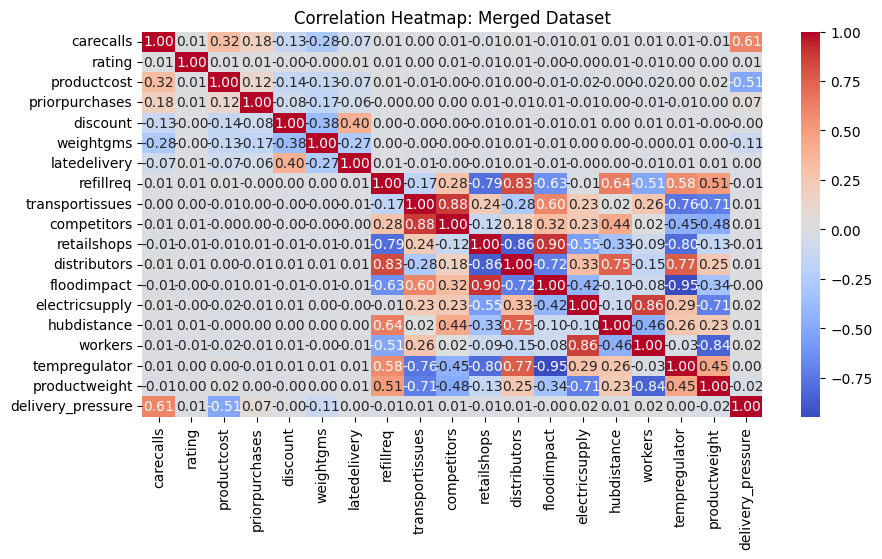

In [ ]:
# prompt: generate heatmap

import matplotlib.pyplot as plt
import numpy as np
# Select numerical columns from the merged DataFrame
merged_numeric = merged_df.select_dtypes(include=np.number)

# Create the correlation matrix for the merged DataFrame
corr_merged = merged_numeric.corr()

# Plotting the merged DataFrame correlation heatmap
plt.figure(figsize=(10, 5)) # Adjust figure size as needed
sns.heatmap(corr_merged, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Merged Dataset')
plt.show()

# EAA

ASSIGNMENT 3 FEEDBACK

For variables that missing/outliers/etc, it is good to know the % compared to the total number of rows.

What specific variables will you like to explore and why?

Fine choice on the many models/features but explanation can be improved



In [ ]:
# ASSIGNMENT 3 FEEDBACK

import pandas as pd

# Load your dataset
# df = pd.read_csv("your_file.csv")  # or any method you already used to load

# Total rows
total_rows = len(merged_df)

# Calculate missing value percentage per column
missing_percent = (merged_df.isnull().sum() / total_rows) * 100
missing_summary = pd.DataFrame({
    'Missing Values': merged_df.isnull().sum(),
    '% of Total Rows': missing_percent
})
print("Missing Value Summary:")
print(missing_summary[missing_summary['Missing Values'] > 0])

# EAA

Missing Value Summary:
Empty DataFrame
Columns: [Missing Values, % of Total Rows]
Index: []


In [ ]:
missing_percent = (merged_df.isnull().sum() / total_rows) * 100

# EAA

In [ ]:
missing_summary = pd.DataFrame({
    'Missing Values': merged_df.isnull().sum(),
    '% of Total Rows': missing_percent
})

# EAA

In [ ]:
missing_summary[missing_summary['Missing Values'] > 0]

# EAA

Empty DataFrame
Columns: [Missing Values, % of Total Rows]
Index: []

In [ ]:
print(missing_summary)

# EAA

                   Missing Values  % of Total Rows
warehouseblock                  0              0.0
shipmentmode                    0              0.0
carecalls                       0              0.0
rating                          0              0.0
productcost                     0              0.0
priorpurchases                  0              0.0
importance                      0              0.0
gender                          0              0.0
discount                        0              0.0
weightgms                       0              0.0
latedelivery                    0              0.0
region                          0              0.0
refillreq                       0              0.0
transportissues                 0              0.0
competitors                     0              0.0
retailshops                     0              0.0
distributors                    0              0.0
floodimpact                     0              0.0
electricsupply                 

BUILD PREDICTIVE MODELS (AFTER VIF AND DROPPED COLUMNS)
MANUALLY CHANGE TRAIN/TEST SPLITS XX/XX

i want a heatmap code with shipmentmode	Strong predictive factor in logistics (e.g., Air, Ground, Ship).
productcost	May impact shipping/handling process and urgency.
priorpurchases	Indicates loyal customers; may influence service priority.
importance	Priority level likely affects delivery speed.
region	Captures geographic variation in delivery performance.
refillreq	May signal urgency or routine logistic behavior.
transportissues	Core logistical variable likely to cause delays.
floodimpact	Environmental factor with direct impact on transportation.

hubdistance	Longer distances generally increase delivery times.
workers	Higher or lower employee count may affect operational efficiency.
productweight	Heavier items may take longer to ship; affects transport choices.
latedelivery	✅ Target variable

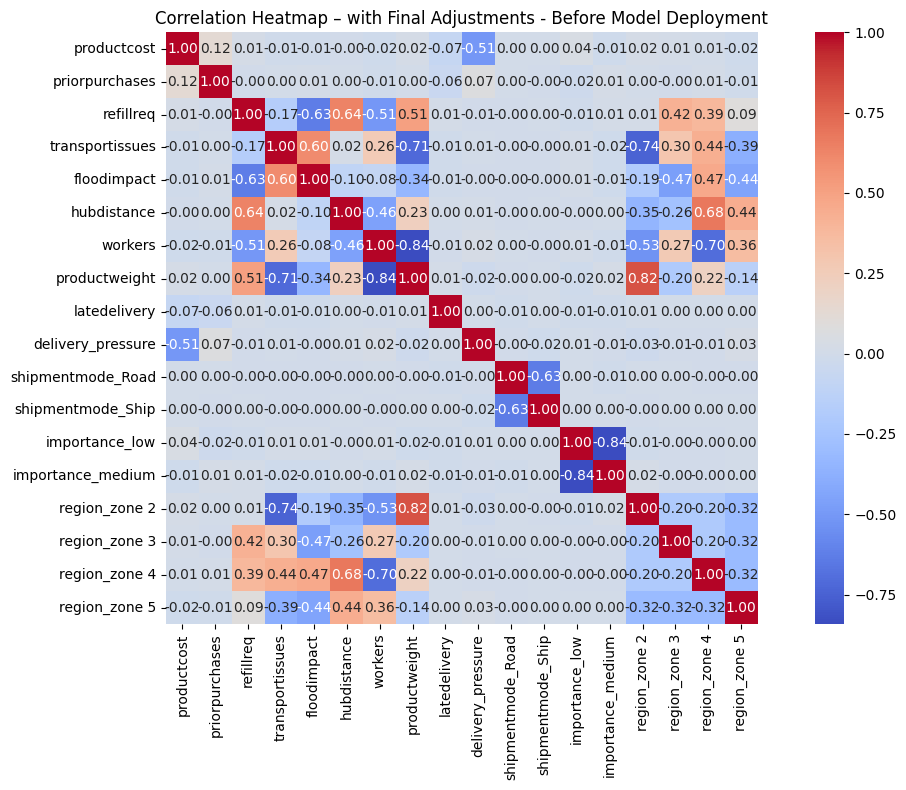

In [ ]:
# Final Heatmap Before Model Deployement
# Encoded Categorical Values to Numerical

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # Import numpy for select_dtypes

# Recreate merged_df based on the previous steps in the notebook
# Load the E-Commerce dataset
ec = pd.read_csv('/content/ec.csv')
# Load the FMCG dataset
fmcg = pd.read_csv('/content/fmgc.csv')

# Outer Join on Cleaned Keys + Merge Key Creation (as in cell 0v_n639KueHg)
block_region_map = {
    'a': 'zone 1',
    'b': 'zone 2',
    'c': 'zone 3',
    'd': 'zone 4',
    'f': 'zone 5'
}

# Clean and map
ec['warehouseblock'] = ec['warehouseblock'].astype(str).str.strip().str.lower()
ec['region'] = ec['warehouseblock'].map(block_region_map)

# Also clean FMCG regions
fmcg['region'] = fmcg['region'].astype(str).str.strip().str.lower()

# Aggregate FMCG by region
fmcg_numeric_cols = fmcg.select_dtypes(include=np.number).columns.tolist()
fmcg_cols_to_agg = ['region'] + fmcg_numeric_cols
fmcg_for_agg = fmcg[fmcg_cols_to_agg]
fmcg_agg = fmcg_for_agg.groupby('region').mean().reset_index()

# Merge on region
merged_df = pd.merge(ec, fmcg_agg, on='region', how='left')

# Drop orderid column (as in cell ju2-wU0Jxntr)
if 'orderid' in merged_df.columns:
    merged_df = merged_df.drop('orderid', axis=1)

# Drop multicollinear columns (as in cell zCIJajzq6LnK)
cols_to_drop = [
    'storageissues',
    'govtchecks',
    'breakdowns',
    'floodproof',
    'estyear'
]
merged_df = merged_df.drop(columns=cols_to_drop)

# Create additional feature: delivery_pressure (as in cell V2g07vjSB3iD)
merged_df['delivery_pressure'] = merged_df['carecalls'] / (merged_df['productcost'] + 1)


# Step 1: Select retained variables (including categorical ones)
selected_columns = [
    'shipmentmode', 'productcost', 'priorpurchases', 'importance', 'region',
    'refillreq', 'transportissues', 'floodimpact', 'hubdistance',
    'workers', 'productweight', 'latedelivery', 'delivery_pressure' # Corrected the typo here
]

# Ensure selected columns are present in the DataFrame
present_selected_columns = [col for col in selected_columns if col in merged_df.columns]

# Step 2: Subset the dataset
heatmap_df = merged_df[present_selected_columns].copy()

# Step 3: Encode categorical variables (do this BEFORE creating the correlation matrix)
# Identify categorical columns within the selected subset
categorical_cols = heatmap_df.select_dtypes(include='object').columns.tolist()
if categorical_cols:
  heatmap_df = pd.get_dummies(heatmap_df, columns=categorical_cols, drop_first=True)

# Step 4: Generate the correlation matrix
corr_matrix = heatmap_df.corr()

# Step 5: Plot the heatmap
plt.figure(figsize=(12, 8)) # Adjusted figure size for better readability
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar=True)
plt.title("Correlation Heatmap – with Final Adjustments - Before Model Deployment")
plt.tight_layout()
plt.show()

In [ ]:
print("Total missing values in dataset:", merged_df.isnull().sum().sum())

# EAA

shipmentmode

productcost

priorpurchases

importance

region

refillreq

transportissues

floodimpact

hubdistance

workers

productweight

latedelivery (target)

In [ ]:
# MASTER SETUP CELL (Run Once Before All Models)

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Set global seed
np.random.seed(42)

# Define retained features
retained_features = [
    'shipmentmode', 'productcost', 'priorpurchases', 'importance',
    'region', 'refillreq', 'transportissues', 'floodimpact',
    'hubdistance', 'workers', 'productweight'
]

# Prepare feature matrix and target
X = pd.get_dummies(merged_df[retained_features], drop_first=True)
y = merged_df['latedelivery']

# Define common split ratios (for loop usage in models)
split_ratios = [0.3, 0.2, 0.1] # 70/30, 80/20, 90/10 TEST/VALIDATION SPLITS

# EAA


Then in every model block:
✅ Always pass random_state=42 inside any model or train_test_split.

So yes — set the seed once up top.
But still use random_state=42 per model and per split to be fully reproducible.


--- Decision Tree (Test Size: 30%) ---
Confusion Matrix:
 [[ 627  704]
 [ 876 1093]]

Classification Report:
               precision    recall  f1-score   support

           0     0.4172    0.4711    0.4425      1331
           1     0.6082    0.5551    0.5805      1969

    accuracy                         0.5212      3300
   macro avg     0.5127    0.5131    0.5115      3300
weighted avg     0.5312    0.5212    0.5248      3300

AUC Score: 0.5149


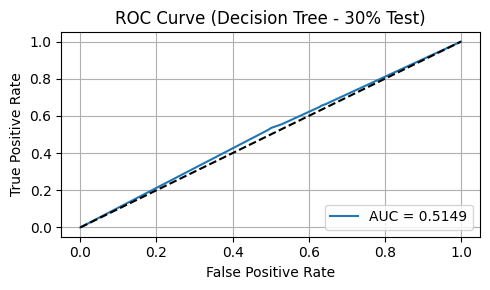


--- Decision Tree (Test Size: 20%) ---
Confusion Matrix:
 [[428 459]
 [611 702]]

Classification Report:
               precision    recall  f1-score   support

           0     0.4119    0.4825    0.4444       887
           1     0.6047    0.5347    0.5675      1313

    accuracy                         0.5136      2200
   macro avg     0.5083    0.5086    0.5060      2200
weighted avg     0.5270    0.5136    0.5179      2200

AUC Score: 0.5136


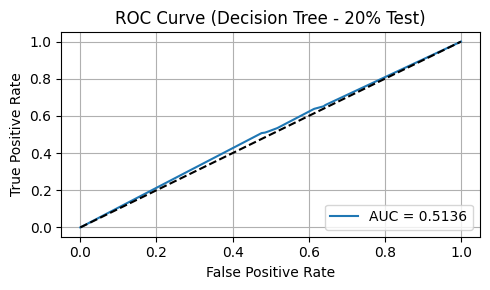


--- Decision Tree (Test Size: 10%) ---
Confusion Matrix:
 [[206 238]
 [294 362]]

Classification Report:
               precision    recall  f1-score   support

           0     0.4120    0.4640    0.4364       444
           1     0.6033    0.5518    0.5764       656

    accuracy                         0.5164      1100
   macro avg     0.5077    0.5079    0.5064      1100
weighted avg     0.5261    0.5164    0.5199      1100

AUC Score: 0.5066


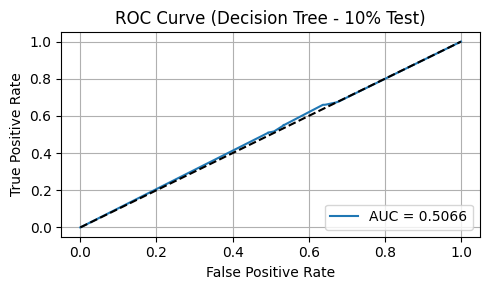

In [ ]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import pandas as pd # Import pandas for get_dummies

# Add roc_data dictionary if it doesn't exist
if 'roc_data' not in locals():
    roc_data = {}

# Initialize model_outputs list if it doesn't exist
if 'model_outputs' not in locals():
    model_outputs = []


# Loop through each test size
for test_size in split_ratios:
    print(f"\n--- Decision Tree (Test Size: {int(test_size * 100)}%) ---")

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=42
    )

    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Print metrics
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))
    auc = roc_auc_score(y_test, y_proba)
    print(f"AUC Score: {auc:.4f}")

    # Store ROC curve data
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    if test_size not in roc_data:
        roc_data[test_size] = {}
    roc_data[test_size]['Decision Tree'] = (fpr, tpr, auc)

    # Store results for summary table
    model_outputs.append({
        "model_name": "Decision Tree",
        "test_size": test_size,
        "y_test": y_test,
        "y_pred": y_pred,
        "y_proba": y_proba
    })


    # ROC curve plot
    plt.figure(figsize=(5, 3))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve (Decision Tree - {int(test_size * 100)}% Test)')
    plt.legend(loc="lower right")
    plt.grid()
    plt.tight_layout()
    plt.show()

# EAA


--- KNN (Test Size: 30%) ---
Confusion Matrix:
 [[ 456  875]
 [ 658 1311]]

Classification Report:
               precision    recall  f1-score   support

           0     0.4093    0.3426    0.3730      1331
           1     0.5997    0.6658    0.6310      1969

    accuracy                         0.5355      3300
   macro avg     0.5045    0.5042    0.5020      3300
weighted avg     0.5229    0.5355    0.5270      3300

AUC Score: 0.5107


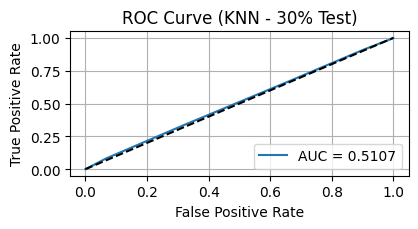


--- KNN (Test Size: 20%) ---
Confusion Matrix:
 [[293 594]
 [452 861]]

Classification Report:
               precision    recall  f1-score   support

           0     0.3933    0.3303    0.3591       887
           1     0.5918    0.6558    0.6221      1313

    accuracy                         0.5245      2200
   macro avg     0.4925    0.4930    0.4906      2200
weighted avg     0.5117    0.5245    0.5161      2200

AUC Score: 0.4926


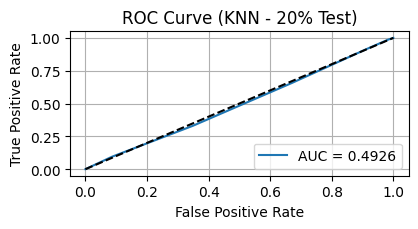


--- KNN (Test Size: 10%) ---
Confusion Matrix:
 [[135 309]
 [209 447]]

Classification Report:
               precision    recall  f1-score   support

           0     0.3924    0.3041    0.3426       444
           1     0.5913    0.6814    0.6331       656

    accuracy                         0.5291      1100
   macro avg     0.4919    0.4927    0.4879      1100
weighted avg     0.5110    0.5291    0.5159      1100

AUC Score: 0.4887


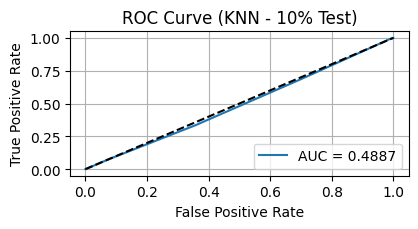

In [ ]:
# K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import pandas as pd # Import pandas for get_dummies

# Standardize features (KNN requires it)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

for test_size in split_ratios:
    print(f"\n--- KNN (Test Size: {int(test_size * 100)}%) ---")

    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=test_size, stratify=y, random_state=42
    )

    model = KNeighborsClassifier()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))
    auc = roc_auc_score(y_test, y_proba)
    print(f"AUC Score: {auc:.4f}")

    # Store ROC curve data
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    if test_size not in roc_data:
        roc_data[test_size] = {}
    roc_data[test_size]['KNN'] = (fpr, tpr, auc)

    # Store results for summary table
    model_outputs.append({
        "model_name": "KNN",
        "test_size": test_size,
        "y_test": y_test,
        "y_pred": y_pred,
        "y_proba": y_proba
    })

    # ROC curve plot
    plt.figure(figsize=(4.2, 2.4))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve (KNN - {int(test_size * 100)}% Test)')
    plt.legend(loc="lower right")
    plt.grid()
    plt.tight_layout()
    plt.show()

# EAA


--- LightGBM (Test Size: 30%) ---
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4594, number of negative: 3105
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000554 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 276
[LightGBM] [Info] Number of data points in the train set: 7699, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.596701 -> initscore=0.391737
[LightGBM] [Info] Start training from score 0.391737
Confusion Matrix:
 [[ 464  867]
 [ 642 1327]]

Classification Report:
               precision    recall  f1-score   support

           0     0.4195    0.3486    0.3808      1331
           1     0.6048    0.6739    0.6375      1969

    accuracy                         0.5427      3300
   macro avg     0.5122    0.5113    0.5092 

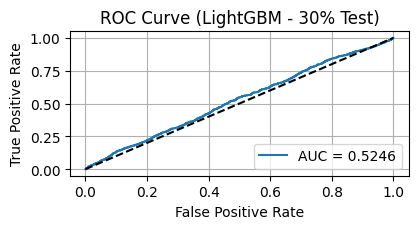


--- LightGBM (Test Size: 20%) ---
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5250, number of negative: 3549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000412 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 277
[LightGBM] [Info] Number of data points in the train set: 8799, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.596659 -> initscore=0.391562
[LightGBM] [Info] Start training from score 0.391562
Confusion Matrix:
 [[287 600]
 [402 911]]

Classification Report:
               precision    recall  f1-score   support

           0     0.4165    0.3236    0.3642       887
           1     0.6029    0.6938    0.6452      1313

    accuracy                         0.5445      2200
   macro avg     0.5097    0.5087    0.5047     

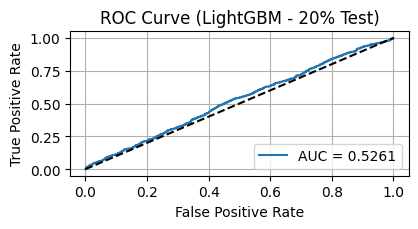


--- LightGBM (Test Size: 10%) ---
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5907, number of negative: 3992
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000460 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 277
[LightGBM] [Info] Number of data points in the train set: 9899, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.596727 -> initscore=0.391846
[LightGBM] [Info] Start training from score 0.391846
Confusion Matrix:
 [[151 293]
 [193 463]]

Classification Report:
               precision    recall  f1-score   support

           0     0.4390    0.3401    0.3832       444
           1     0.6124    0.7058    0.6558       656

    accuracy                         0.5582      1100
   macro avg     0.5257    0.5229    0.5195     

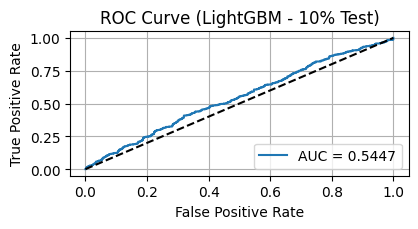

In [ ]:
# LightGBM with n_estimators 1000

from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

for test_size in split_ratios:
    print(f"\n--- LightGBM (Test Size: {int(test_size * 100)}%) ---")

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=42
    )

    model = LGBMClassifier(n_estimators=1000, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))
    auc = roc_auc_score(y_test, y_proba)
    print(f"AUC Score: {auc:.4f}")

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    # Store ROC curve data
    if test_size not in roc_data:
        roc_data[test_size] = {}
    roc_data[test_size]['LightGBM'] = (fpr, tpr, auc)

    # Store results for summary table
    model_outputs.append({
        "model_name": "LightGBM",
        "test_size": test_size,
        "y_test": y_test,
        "y_pred": y_pred,
        "y_proba": y_proba
    })

    plt.figure(figsize=(4.2, 2.4))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve (LightGBM - {int(test_size * 100)}% Test)')
    plt.legend(loc="lower right")
    plt.grid()
    plt.tight_layout()
    plt.show()

# EAA


--- Logistic Regression (Test Size: 30%) ---
Confusion Matrix:
 [[  34 1297]
 [  49 1920]]

Classification Report:
               precision    recall  f1-score   support

           0     0.4096    0.0255    0.0481      1331
           1     0.5968    0.9751    0.7405      1969

    accuracy                         0.5921      3300
   macro avg     0.5032    0.5003    0.3943      3300
weighted avg     0.5213    0.5921    0.4612      3300

AUC Score: 0.5454


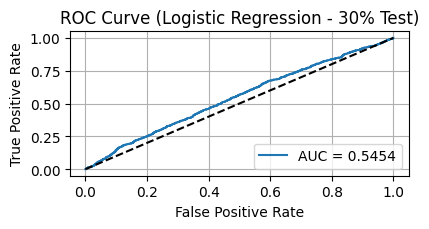


--- Logistic Regression (Test Size: 20%) ---
Confusion Matrix:
 [[  14  873]
 [  19 1294]]

Classification Report:
               precision    recall  f1-score   support

           0     0.4242    0.0158    0.0304       887
           1     0.5971    0.9855    0.7437      1313

    accuracy                         0.5945      2200
   macro avg     0.5107    0.5007    0.3871      2200
weighted avg     0.5274    0.5945    0.4561      2200

AUC Score: 0.5405


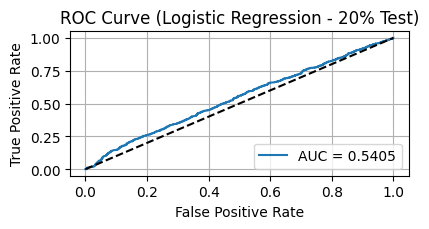


--- Logistic Regression (Test Size: 10%) ---
Confusion Matrix:
 [[  5 439]
 [ 11 645]]

Classification Report:
               precision    recall  f1-score   support

           0     0.3125    0.0113    0.0217       444
           1     0.5950    0.9832    0.7414       656

    accuracy                         0.5909      1100
   macro avg     0.4538    0.4972    0.3816      1100
weighted avg     0.4810    0.5909    0.4509      1100

AUC Score: 0.5485


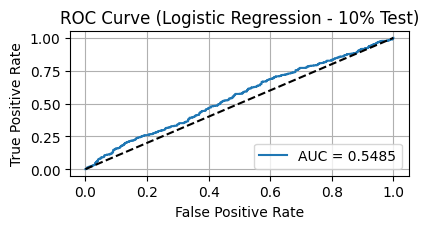

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt # Import matplotlib for plotting

# Standardize features for logistic regression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

for test_size in split_ratios:
    print(f"\n--- Logistic Regression (Test Size: {int(test_size * 100)}%) ---")

    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=test_size, stratify=y, random_state=42
    )

    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))
    auc = roc_auc_score(y_test, y_proba)
    print(f"AUC Score: {auc:.4f}")

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    # Store ROC curve data
    if test_size not in roc_data:
        roc_data[test_size] = {}
    roc_data[test_size]['Logistic Regression'] = (fpr, tpr, auc)

    # Store results for summary table
    model_outputs.append({
        "model_name": "Logistic Regression",
        "test_size": test_size,
        "y_test": y_test,
        "y_pred": y_pred,
        "y_proba": y_proba
    })

    plt.figure(figsize=(4.2, 2.4))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve (Logistic Regression - {int(test_size * 100)}% Test)')
    plt.legend(loc="lower right")
    plt.grid()
    plt.tight_layout()
    plt.show()

# EAA


--- Naive Bayes (Test Size: 30%) ---
Confusion Matrix:
 [[ 134 1197]
 [ 186 1783]]

Classification Report:
               precision    recall  f1-score   support

           0     0.4188    0.1007    0.1623      1331
           1     0.5983    0.9055    0.7205      1969

    accuracy                         0.5809      3300
   macro avg     0.5085    0.5031    0.4414      3300
weighted avg     0.5259    0.5809    0.4954      3300

AUC Score: 0.5185


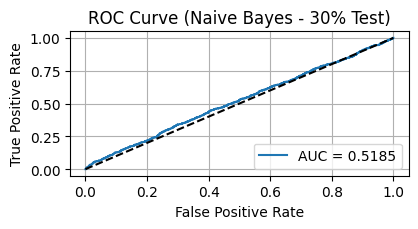


--- Naive Bayes (Test Size: 20%) ---
Confusion Matrix:
 [[  67  820]
 [  84 1229]]

Classification Report:
               precision    recall  f1-score   support

           0     0.4437    0.0755    0.1291       887
           1     0.5998    0.9360    0.7311      1313

    accuracy                         0.5891      2200
   macro avg     0.5218    0.5058    0.4301      2200
weighted avg     0.5369    0.5891    0.4884      2200

AUC Score: 0.5140


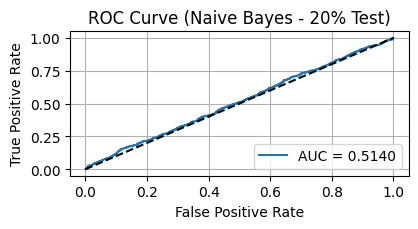


--- Naive Bayes (Test Size: 10%) ---
Confusion Matrix:
 [[ 28 416]
 [ 30 626]]

Classification Report:
               precision    recall  f1-score   support

           0     0.4828    0.0631    0.1116       444
           1     0.6008    0.9543    0.7373       656

    accuracy                         0.5945      1100
   macro avg     0.5418    0.5087    0.4244      1100
weighted avg     0.5531    0.5945    0.4847      1100

AUC Score: 0.5312


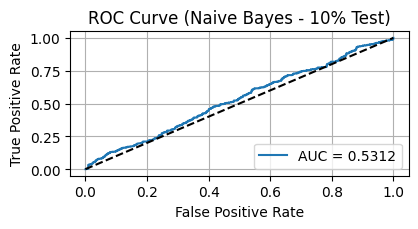

In [ ]:
# Naive Bayes (Gaussian)
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Standardize features for consistency
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

for test_size in split_ratios:
    print(f"\n--- Naive Bayes (Test Size: {int(test_size * 100)}%) ---")

    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=test_size, stratify=y, random_state=42
    )

    model = GaussianNB()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))
    auc = roc_auc_score(y_test, y_proba)
    print(f"AUC Score: {auc:.4f}")

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(4.2, 2.4))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve (Naive Bayes - {int(test_size * 100)}% Test)')
    plt.legend(loc="lower right")
    plt.grid()
    plt.tight_layout()
    plt.show()

    # Store results for summary table
    model_outputs.append({
        "model_name": "Naive Bayes",
        "test_size": test_size,
        "y_test": y_test,
        "y_pred": y_pred,
        "y_proba": y_proba
    })

    # EAA


--- Neural Network (Test Size: 30%) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Confusion Matrix:
 [[ 186 1145]
 [ 218 1751]]

Classification Report:
               precision    recall  f1-score   support

           0     0.4604    0.1397    0.2144      1331
           1     0.6046    0.8893    0.7198      1969

    accuracy                         0.5870      3300
   macro avg     0.5325    0.5145    0.4671      3300
weighted avg     0.5465    0.5870    0.5160      3300

AUC Score: 0.5419


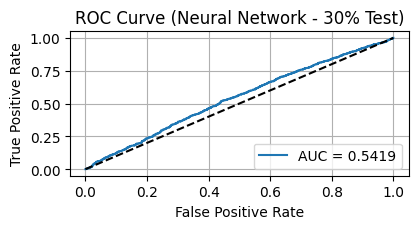


--- Neural Network (Test Size: 20%) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Confusion Matrix:
 [[ 126  761]
 [ 150 1163]]

Classification Report:
               precision    recall  f1-score   support

           0     0.4565    0.1421    0.2167       887
           1     0.6045    0.8858    0.7186      1313

    accuracy                         0.5859      2200
   macro avg     0.5305    0.5139    0.4676      2200
weighted avg     0.5448    0.5859    0.5162      2200

AUC Score: 0.5429


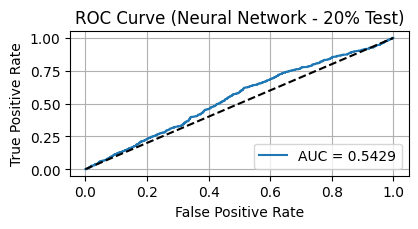


--- Neural Network (Test Size: 10%) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Confusion Matrix:
 [[ 47 397]
 [ 61 595]]

Classification Report:
               precision    recall  f1-score   support

           0     0.4352    0.1059    0.1703       444
           1     0.5998    0.9070    0.7221       656

    accuracy                         0.5836      1100
   macro avg     0.5175    0.5064    0.4462      1100
weighted avg     0.5334    0.5836    0.4994      1100

AUC Score: 0.5472


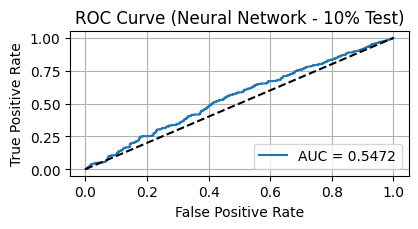

In [ ]:
# Neural Network (Approximately 5 minute processing time)
# epoch 75, batch_size 32, validation_split 0.2


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Set seeds
np.random.seed(42)
tf.random.set_seed(42)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Loop over split ratios
for test_size in [0.3, 0.2, 0.1]:
    print(f"\n--- Neural Network (Test Size: {int(test_size * 100)}%) ---")

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=test_size, stratify=y, random_state=42
    )

    # Define model
    model = Sequential([
        Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    # Compile model
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
    )

    # Fit model
    history = model.fit(
        X_train, y_train,
        epochs=75,
        batch_size=32,
        validation_split=0.0, # Changed to 0 as it's for testing on X_test later
        verbose=0  # Suppress epoch-by-epoch logs
    )

    # Predict
    y_proba = model.predict(X_test).flatten()
    y_pred = (y_proba >= 0.5).astype(int)

    # Evaluate
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))
    auc = roc_auc_score(y_test, y_proba)
    print(f"AUC Score: {auc:.4f}")

    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(4.2, 2.4))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve (Neural Network - {int(test_size * 100)}% Test)')
    plt.legend(loc="lower right")
    plt.grid()
    plt.tight_layout()
    plt.show()

    # Store results for summary table
    model_outputs.append({
        "model_name": "Neural Network",
        "test_size": test_size,
        "y_test": y_test,
        "y_pred": y_pred,
        "y_proba": y_proba
    })


# EAA


--- Random Forest (Test Size: 30%) ---
Confusion Matrix:
 [[ 541  790]
 [ 761 1208]]

Classification Report:
               precision    recall  f1-score   support

           0     0.4155    0.4065    0.4109      1331
           1     0.6046    0.6135    0.6090      1969

    accuracy                         0.5300      3300
   macro avg     0.5101    0.5100    0.5100      3300
weighted avg     0.5283    0.5300    0.5291      3300

AUC Score: 0.5244


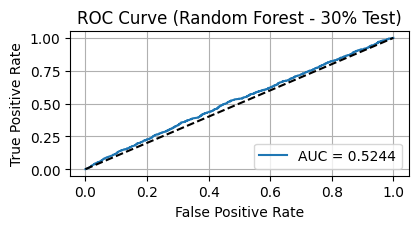


--- Random Forest (Test Size: 20%) ---
Confusion Matrix:
 [[345 542]
 [512 801]]

Classification Report:
               precision    recall  f1-score   support

           0     0.4026    0.3890    0.3956       887
           1     0.5964    0.6101    0.6032      1313

    accuracy                         0.5209      2200
   macro avg     0.4995    0.4995    0.4994      2200
weighted avg     0.5183    0.5209    0.5195      2200

AUC Score: 0.5057


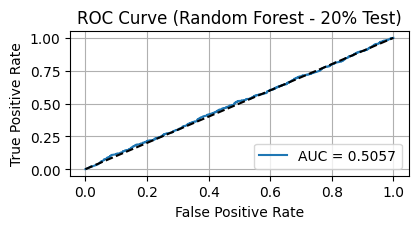


--- Random Forest (Test Size: 10%) ---
Confusion Matrix:
 [[171 273]
 [249 407]]

Classification Report:
               precision    recall  f1-score   support

           0     0.4071    0.3851    0.3958       444
           1     0.5985    0.6204    0.6093       656

    accuracy                         0.5255      1100
   macro avg     0.5028    0.5028    0.5026      1100
weighted avg     0.5213    0.5255    0.5231      1100

AUC Score: 0.4994


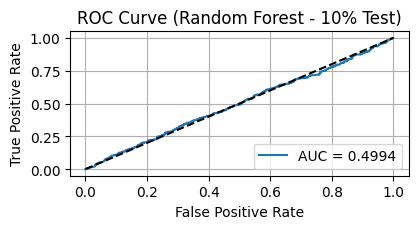

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

for test_size in split_ratios:
    print(f"\n--- Random Forest (Test Size: {int(test_size * 100)}%) ---")

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=42
    )

    model = RandomForestClassifier(n_estimators=200, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))
    auc = roc_auc_score(y_test, y_proba)
    print(f"AUC Score: {auc:.4f}")

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(4.2, 2.4))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve (Random Forest - {int(test_size * 100)}% Test)')
    plt.legend(loc="lower right")
    plt.grid()
    plt.tight_layout()
    plt.show()

    # Store results for summary table
    model_outputs.append({
        "model_name": "Random Forest",
        "test_size": test_size,
        "y_test": y_test,
        "y_pred": y_pred,
        "y_proba": y_proba
    })


--- SVM (Test Size: 30%) ---
Confusion Matrix:
 [[   5 1326]
 [  15 1954]]

Classification Report:
               precision    recall  f1-score   support

           0     0.2500    0.0038    0.0074      1331
           1     0.5957    0.9924    0.7445      1969

    accuracy                         0.5936      3300
   macro avg     0.4229    0.4981    0.3760      3300
weighted avg     0.4563    0.5936    0.4472      3300

AUC Score: 0.5124


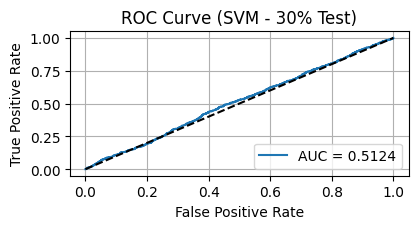


--- SVM (Test Size: 20%) ---
Confusion Matrix:
 [[   2  885]
 [   8 1305]]

Classification Report:
               precision    recall  f1-score   support

           0     0.2000    0.0023    0.0045       887
           1     0.5959    0.9939    0.7451      1313

    accuracy                         0.5941      2200
   macro avg     0.3979    0.4981    0.3748      2200
weighted avg     0.4363    0.5941    0.4465      2200

AUC Score: 0.5160


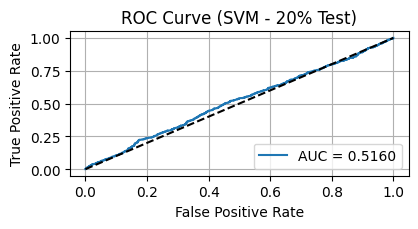


--- SVM (Test Size: 10%) ---
Confusion Matrix:
 [[  0 444]
 [  3 653]]

Classification Report:
               precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000       444
           1     0.5953    0.9954    0.7450       656

    accuracy                         0.5936      1100
   macro avg     0.2976    0.4977    0.3725      1100
weighted avg     0.3550    0.5936    0.4443      1100

AUC Score: 0.4635


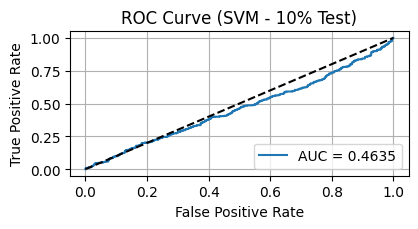

In [ ]:
# Support Vector Machine (SVM)
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

for test_size in split_ratios:
    print(f"\n--- SVM (Test Size: {int(test_size * 100)}%) ---")

    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=test_size, stratify=y, random_state=42
    )

    model = SVC(kernel='rbf', probability=True, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))
    auc = roc_auc_score(y_test, y_proba)
    print(f"AUC Score: {auc:.4f}")

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(4.2, 2.4))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve (SVM - {int(test_size * 100)}% Test)')
    plt.legend(loc="lower right")
    plt.grid()
    plt.tight_layout()
    plt.show()

    # Store results for summary table
    model_outputs.append({
        "model_name": "SVM",
        "test_size": test_size,
        "y_test": y_test,
        "y_pred": y_pred,
        "y_proba": y_proba
    })
# EAA


--- XGBoost (Test Size: 30%) ---


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:10:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Confusion Matrix:
 [[ 528  803]
 [ 688 1281]]

Classification Report:
               precision    recall  f1-score   support

           0     0.4342    0.3967    0.4146      1331
           1     0.6147    0.6506    0.6321      1969

    accuracy                         0.5482      3300
   macro avg     0.5244    0.5236    0.5234      3300
weighted avg     0.5419    0.5482    0.5444      3300

AUC Score: 0.5242


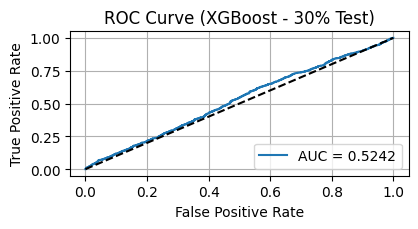


--- XGBoost (Test Size: 20%) ---


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:10:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Confusion Matrix:
 [[332 555]
 [442 871]]

Classification Report:
               precision    recall  f1-score   support

           0     0.4289    0.3743    0.3998       887
           1     0.6108    0.6634    0.6360      1313

    accuracy                         0.5468      2200
   macro avg     0.5199    0.5188    0.5179      2200
weighted avg     0.5375    0.5468    0.5408      2200

AUC Score: 0.5258


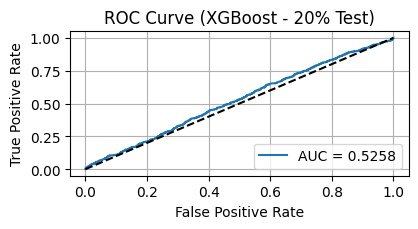


--- XGBoost (Test Size: 10%) ---


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:10:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Confusion Matrix:
 [[172 272]
 [227 429]]

Classification Report:
               precision    recall  f1-score   support

           0     0.4311    0.3874    0.4081       444
           1     0.6120    0.6540    0.6323       656

    accuracy                         0.5464      1100
   macro avg     0.5215    0.5207    0.5202      1100
weighted avg     0.5390    0.5464    0.5418      1100

AUC Score: 0.5253


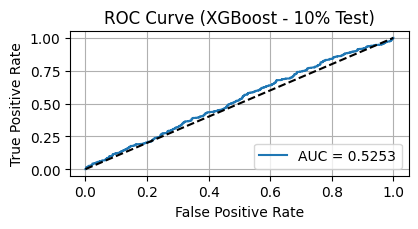

In [ ]:
# XGBoost
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

for test_size in split_ratios:
    print(f"\n--- XGBoost (Test Size: {int(test_size * 100)}%) ---")

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=42
    )

    model = XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        n_estimators=1000,
        random_state=42
    )
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))
    auc = roc_auc_score(y_test, y_proba)
    print(f"AUC Score: {auc:.4f}")

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(4.2, 2.4))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve (XGBoost - {int(test_size * 100)}% Test)')
    plt.legend(loc="lower right")
    plt.grid()
    plt.tight_layout()
    plt.show()

    # Store results for summary table
    model_outputs.append({
        "model_name": "XGBoost",
        "test_size": test_size,
        "y_test": y_test,
        "y_pred": y_pred,
        "y_proba": y_proba
    })


# EAA

MODEL EVALUATIONS (AFTER RUNNING AND PREDICTIVE MODELS)

In [ ]:
# F1/Precision/Recall/AUC Results Logger Excel Output

import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

# Store all your model runs and metrics in this list
# results = [] # This will be built from model_outputs

# Initialize model_outputs list if it doesn't exist or is empty from previous runs
if 'model_outputs' not in locals() or not model_outputs:
    print("model_outputs list is not populated. Please run the model training cells first.")
    # As a fallback for demonstration or if prior cells were run but variable lost
    # We will attempt to process whatever is in model_outputs, which might be empty
    model_outputs = [] # Initialize as empty list

# Example (repeat for each model + test size)
results = []
for output in model_outputs:
    model_name = output["model_name"]
    test_size = output["test_size"] # Ensure test_size is treated as a number here
    y_test = output["y_test"]
    y_pred = output["y_pred"]
    y_proba = output["y_proba"]

    results.append({
        "Model": model_name,
        "T/T": f"{int((1 - float(test_size)) * 100)}/{int(float(test_size) * 100)}", # Ensure test_size is float for calculation
        "Precision (Class 0)": precision_score(y_test, y_pred, pos_label=0),
        "Recall (Class 0)": recall_score(y_test, y_pred, pos_label=0),
        "F1 Score (Class 0)": f1_score(y_test, y_pred, pos_label=0),
        "Precision (Class 1)": precision_score(y_test, y_pred, pos_label=1),
        "Recall (Class 1)": recall_score(y_test, y_pred, pos_label=1),
        "F1 Score (Class 1)": f1_score(y_test, y_pred, pos_label=1),
        "Accuracy": accuracy_score(y_test, y_pred),
        "AUC/ROC": roc_auc_score(y_test, y_proba)
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Export to Excel
results_df.to_excel("Capstone_Model_Summary.xlsx", index=False)

print("✅ All model results saved to Capstone_Model_Summary.xlsx")

# EAA

✅ All model results saved to Capstone_Model_Summary.xlsx


MANUALLY DOWNLOAD THE CAPSTON_MODEL_SUMMARY FROM CONTENT AREA


Comparison of F1 Scores (Class 1) Across Models and Test Splits:
                        70/30     80/20     90/10
Decision Tree        0.580457  0.567502  0.576433
KNN                  0.631047  0.622110  0.633144
LightGBM             0.637521  0.645184  0.655807
Logistic Regression  0.740455  0.743678  0.741379
Naive Bayes          0.720550  0.731112  0.737338
Neural Network       0.719836  0.718567  0.722087
Random Forest        0.609024  0.603163  0.609281
SVM                  0.744523  0.745076  0.745009
XGBoost              0.632124  0.635999  0.632277


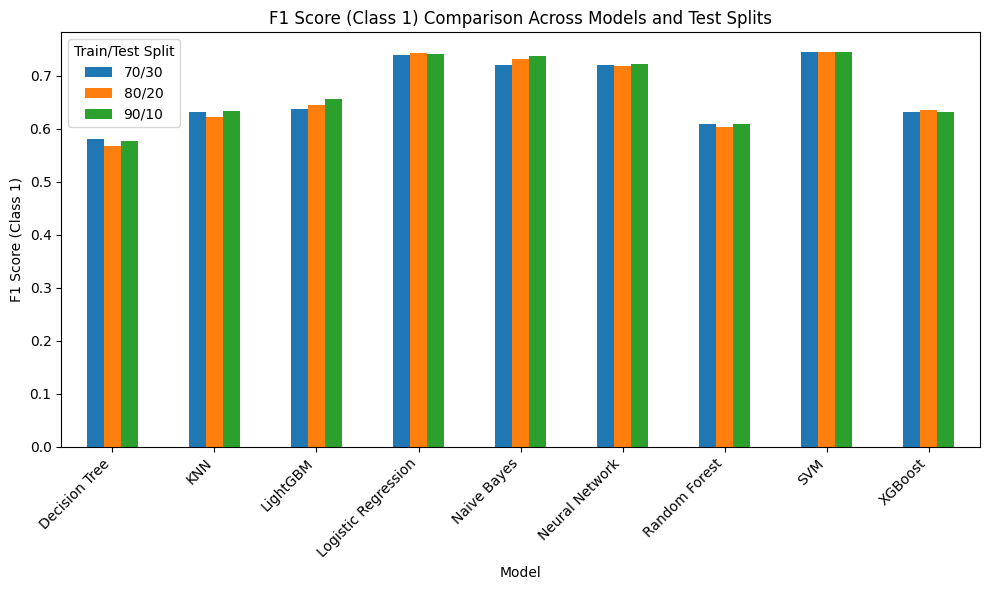

In [ ]:
# prompt: create a comparison of ALL models at 70/30, 80/20, 90/10 with F1 scores (Class 1)

import pandas as pd
import matplotlib.pyplot as plt
# Create a summary DataFrame focusing on F1 Score (Class 1) for comparison
f1_comparison = pd.DataFrame()

# Iterate through the collected results
for result in results:
    model_name = result['Model']
    test_size_str = result['T/T']
    f1_class1 = result['F1 Score (Class 1)']

    # Add the F1 score to the DataFrame, indexed by model and columns by test size
    f1_comparison.loc[model_name, test_size_str] = f1_class1

# Reorder columns to match the desired 70/30, 80/20, 90/10 order
comparison_cols = ['70/30', '80/20', '90/10']
f1_comparison = f1_comparison[comparison_cols]

print("\nComparison of F1 Scores (Class 1) Across Models and Test Splits:")
print(f1_comparison)

# Optional: Visualize the comparison
f1_comparison.plot(kind='bar', figsize=(10, 6))
plt.title('F1 Score (Class 1) Comparison Across Models and Test Splits')
plt.xlabel('Model')
plt.ylabel('F1 Score (Class 1)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Train/Test Split')
plt.tight_layout()
plt.show()


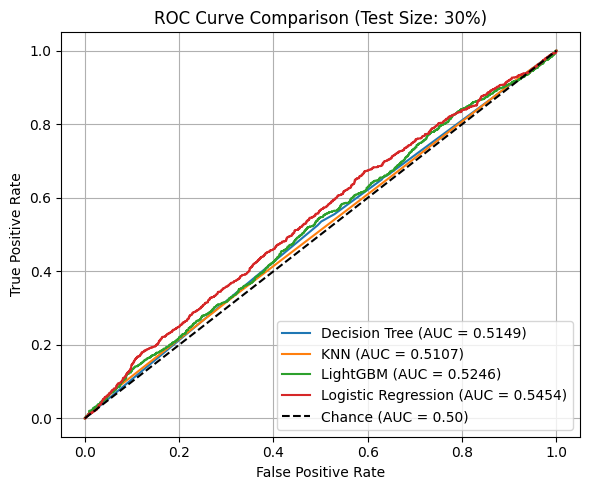

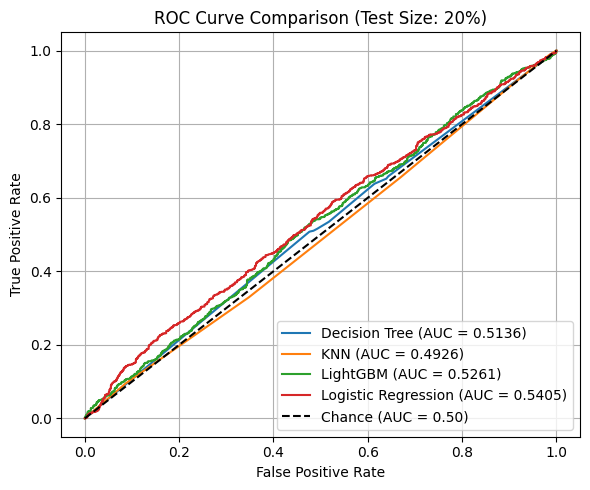

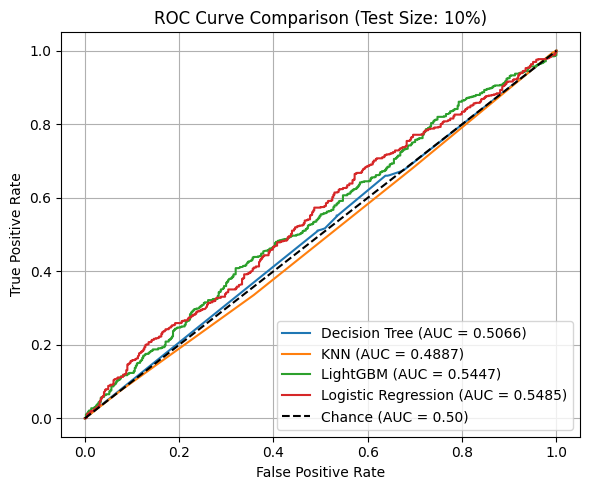

In [ ]:
# prompt: create a ROC Curve Comparison of all models at 70/30, 80/20, and 90/10

import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score


# Plot ROC curves for comparison across models for each split ratio
for test_size, models_data in roc_data.items():
    plt.figure(figsize=(6, 5))
    for model_name, (fpr, tpr, auc) in models_data.items():
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.4f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Chance (AUC = 0.50)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve Comparison (Test Size: {int(test_size * 100)}%)')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# EAA

Retrieve the DL from the Content Area

In [ ]:
# prompt: generate a visualization to compare the top 3 models by F1 (Class 1) for all train test splits

import pandas as pd
# Sort the F1 comparison DataFrame by F1 Score (Class 1) for each split,
# then take the top 3 models for visualization.

# Create a list to store data for the melted DataFrame
melted_data = []

# Iterate through each split size
for split in comparison_cols:
    # Get the F1 scores for this split, sort them, and select the top 3
    top_3_models_for_split = f1_comparison[split].sort_values(ascending=False).head(3)

    # Add data to the melted_data list
    for model, f1 in top_3_models_for_split.items():
        melted_data.append({'Model': model, 'Split': split, 'F1_Class1': f1})

# Create a DataFrame from the collected data
top_3_f1_df = pd.DataFrame(melted_data)

# Create the bar plot using Plotly Express for better interactivity
fig = px.bar(
    top_3_f1_df,
    x='Model',
    y='F1_Class1',
    color='Split',
    barmode='group',
    text='F1_Class1', # Display the F1 score on the bars
    title='Top 3 Models by F1 Score (Class 1) Across Train/Test Splits'
)

# Customize the layout
fig.update_layout(
    xaxis_title='Model',
    yaxis_title='F1 Score (Class 1)',
    yaxis_range=[0, top_3_f1_df['F1_Class1'].max() * 1.1], # Extend y-axis slightly
    legend_title='Train/Test Split'
)

# Format the text displayed on the bars
fig.update_traces(texttemplate='%{text:.4f}', textposition='outside')

# Show the plot
fig.show()



In [ ]:
# prompt: generate a visualization to compare the top 3 models by Recall (Class 1) for all train test splits

import pandas as pd
# Create a summary DataFrame focusing on Recall (Class 1) for comparison
recall_comparison = pd.DataFrame()

# Iterate through the collected results
for result in results:
    model_name = result['Model']
    test_size_str = result['T/T']
    recall_class1 = result['Recall (Class 1)']

    # Add the Recall score to the DataFrame, indexed by model and columns by test size
    recall_comparison.loc[model_name, test_size_str] = recall_class1

# Reorder columns to match the desired 70/30, 80/20, 90/10 order
comparison_cols = ['70/30', '80/20', '90/10']
recall_comparison = recall_comparison[comparison_cols]

print("\nComparison of Recall (Class 1) Across Models and Test Splits:")
print(recall_comparison)


# Create a list to store data for the melted DataFrame focusing on Recall (Class 1)
melted_recall_data = []

# Iterate through each split size
for split in comparison_cols:
    # Get the Recall scores for this split, sort them, and select the top 3
    # Ensure we handle potential NaN values from models that might not have run for all splits
    top_3_models_for_split = recall_comparison[split].dropna().sort_values(ascending=False).head(3)

    # Add data to the melted_recall_data list
    for model, recall in top_3_models_for_split.items():
        melted_recall_data.append({'Model': model, 'Split': split, 'Recall_Class1': recall})

# Create a DataFrame from the collected data
top_3_recall_df = pd.DataFrame(melted_recall_data)

# Create the bar plot using Plotly Express for better interactivity
fig = px.bar(
    top_3_recall_df,
    x='Model',
    y='Recall_Class1',
    color='Split',
    barmode='group',
    text='Recall_Class1', # Display the Recall score on the bars
    title='Top 3 Models by Recall (Class 1) Across Train/Test Splits'
)

# Customize the layout
fig.update_layout(
    xaxis_title='Model',
    yaxis_title='Recall (Class 1)',
    yaxis_range=[0, top_3_recall_df['Recall_Class1'].max() * 1.1], # Extend y-axis slightly
    legend_title='Train/Test Split'
)

# Format the text displayed on the bars
fig.update_traces(texttemplate='%{text:.4f}', textposition='outside')

# Show the plot
fig.show()



Comparison of Recall (Class 1) Across Models and Test Splits:
                        70/30     80/20     90/10
Decision Tree        0.555104  0.534653  0.551829
KNN                  0.665820  0.655750  0.681402
LightGBM             0.673946  0.693831  0.705793
Logistic Regression  0.975114  0.985529  0.983232
Naive Bayes          0.905536  0.936024  0.954268
Neural Network       0.889284  0.885758  0.907012
Random Forest        0.613509  0.610053  0.620427
SVM                  0.992382  0.993907  0.995427
XGBoost              0.650584  0.663366  0.653963


 Final Stats Recap:

    Total variables in heatmap = 17

    Variables visible in histogram = 8

    Dummy + target variables excluded from histogram = 9

<Figure size 1600x1200 with 0 Axes>

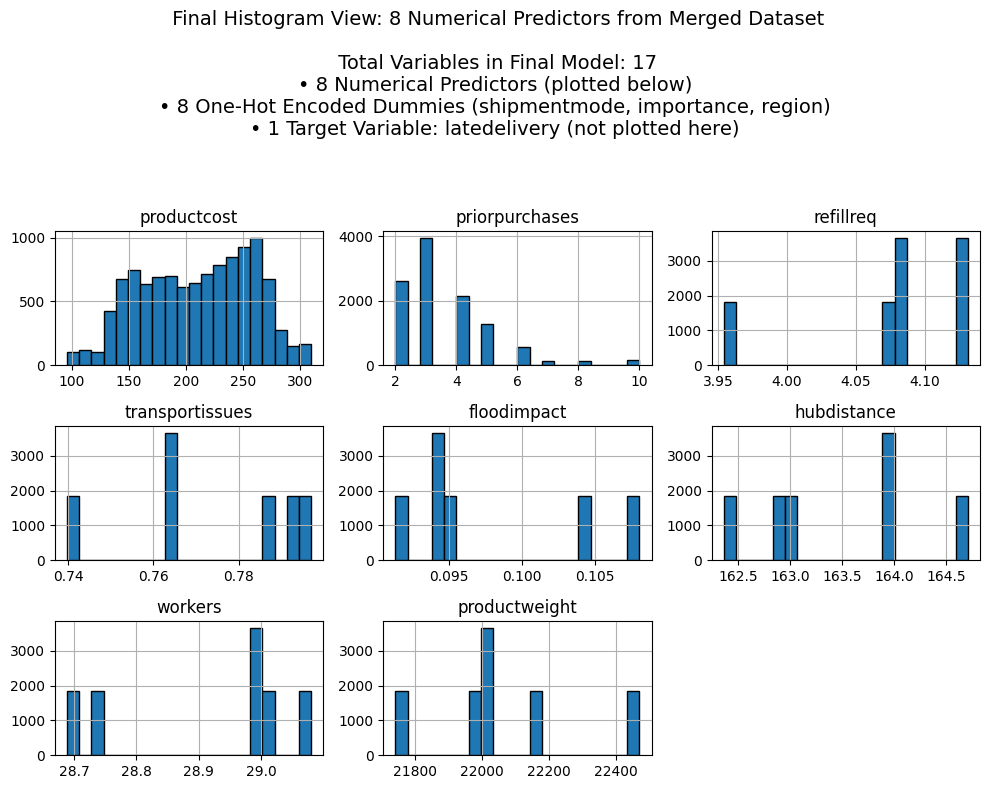

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Recreate merged_df based on the previous steps in the notebook
# Load the E-Commerce dataset
ec = pd.read_csv('/content/ec.csv')
# Load the FMCG dataset
fmcg = pd.read_csv('/content/fmgc.csv')

# Outer Join on Cleaned Keys + Merge Key Creation (as in cell 0v_n639KueHg)
block_region_map = {
    'a': 'zone 1',
    'b': 'zone 2',
    'c': 'zone 3',
    'd': 'zone 4',
    'f': 'zone 5'
}

# Clean and map
ec['warehouseblock'] = ec['warehouseblock'].astype(str).str.strip().str.lower()
ec['region'] = ec['warehouseblock'].map(block_region_map)

# Also clean FMCG regions
fmcg['region'] = fmcg['region'].astype(str).str.strip().str.lower()

# Aggregate FMCG by region
fmcg_numeric_cols = fmcg.select_dtypes(include=np.number).columns.tolist()
fmcg_cols_to_agg = ['region'] + fmcg_numeric_cols
fmcg_for_agg = fmcg[fmcg_cols_to_agg]
fmcg_agg = fmcg_for_agg.groupby('region').mean().reset_index()

# Merge on region
merged_df = pd.merge(ec, fmcg_agg, on='region', how='left')

# Drop orderid column (as in cell ju2-wU0Jxntr)
if 'orderid' in merged_df.columns:
    merged_df = merged_df.drop('orderid', axis=1)

# Drop multicollinear columns (as in cell zCIJajzq6LnK)
cols_to_drop = [
    'storageissues',
    'govtchecks',
    'breakdowns',
    'floodproof',
    'estyear'
]
merged_df = merged_df.drop(columns=cols_to_drop)

# Create additional feature: delivery_pressure (as in cell V2g07vjSB3iD)
merged_df['delivery_pressure'] = merged_df['carecalls'] / (merged_df['productcost'] + 1)


# Final 8 numerical features (based on merged df structure, excluding new feature)
numerical_cols = [
    'productcost',
    'priorpurchases',
    'refillreq',
    'transportissues',
    'floodimpact',
    'hubdistance',
    'workers',
    'productweight'

]

# Plot histograms for merged_df
plt.figure(figsize=(16, 12))
merged_df[numerical_cols].hist(
    bins=20, layout=(3, 3), figsize=(10, 8), edgecolor='black'
)

# Recap title at the top
plt.suptitle(
    " Final Histogram View: 8 Numerical Predictors from Merged Dataset\n\n"
    " Total Variables in Final Model: 17\n"
    "• 8 Numerical Predictors (plotted below)\n"
    "• 8 One-Hot Encoded Dummies (shipmentmode, importance, region)\n"
    "• 1 Target Variable: latedelivery (not plotted here)",
    fontsize=14,
    ha='center'
)

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()


Class Balance (0: On-Time, 1: Late):
latedelivery
1    6563
0    4436
Name: count, dtype: int64


/tmp/ipython-input-51-496300808.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




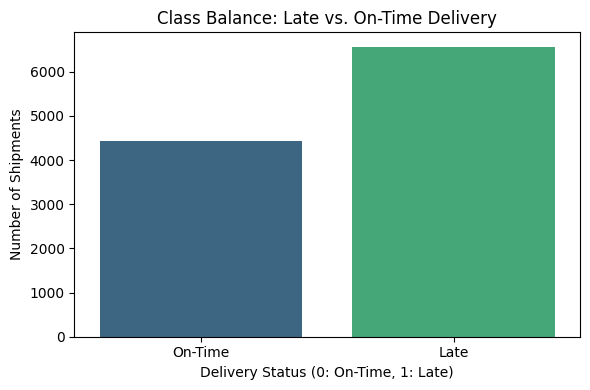

In [ ]:
# prompt: create Bar Plot: to clearly display class balance Late vs. On-Time

import matplotlib.pyplot as plt
import seaborn as sns # Import seaborn
# Analyze the class balance of the target variable 'latedelivery'
class_balance = merged_df['latedelivery'].value_counts()
print("\nClass Balance (0: On-Time, 1: Late):")
print(class_balance)

# Create a bar plot for class balance
plt.figure(figsize=(6, 4))
sns.countplot(x='latedelivery', data=merged_df, palette='viridis')
plt.title('Class Balance: Late vs. On-Time Delivery')
plt.xlabel('Delivery Status (0: On-Time, 1: Late)')
plt.ylabel('Number of Shipments')
plt.xticks([0, 1], ['On-Time', 'Late']) # Label the x-axis ticks
plt.tight_layout()
plt.show()


Class Balance (0: On-Time, 1: Late):
latedelivery
1    6563
0    4436
Name: count, dtype: int64
Late Deliveries: 59.67%
Timely Deliveries: 40.33%


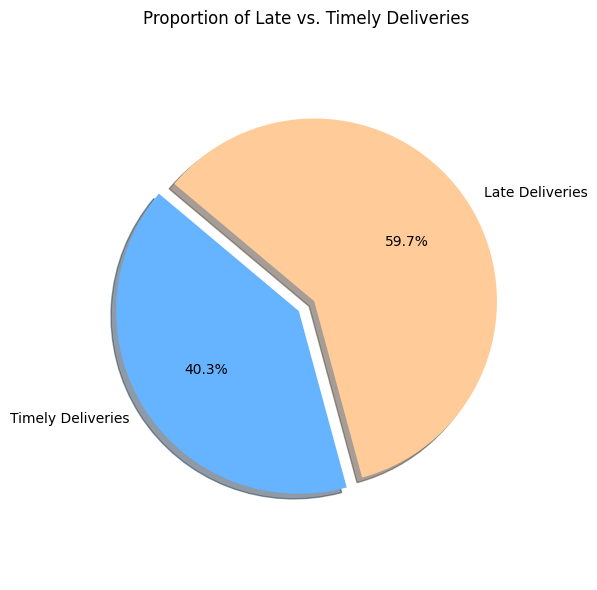

In [ ]:
# prompt: create Pie Chart: to visually emphasize proportion of late vs. timely deliveries.

import matplotlib.pyplot as plt
# Analyze the class balance of the target variable 'latedelivery'
class_balance = merged_df['latedelivery'].value_counts()

# Calculate percentages
total_deliveries = class_balance.sum()
late_percentage = (class_balance[1] / total_deliveries) * 100 if 1 in class_balance else 0
timely_percentage = (class_balance[0] / total_deliveries) * 100 if 0 in class_balance else 0

print("\nClass Balance (0: On-Time, 1: Late):")
print(class_balance)
print(f"Late Deliveries: {late_percentage:.2f}%")
print(f"Timely Deliveries: {timely_percentage:.2f}%")


# Create data for the pie chart
labels = ['Timely Deliveries', 'Late Deliveries']
sizes = [class_balance.get(0, 0), class_balance.get(1, 0)] # Use .get(key, 0) for safety
colors = ['#66b3ff', '#ffcc99'] # Example colors
explode = (0, 0.1)  # Explode the 'Late Deliveries' slice for emphasis

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.title('Proportion of Late vs. Timely Deliveries')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


/tmp/ipython-input-53-1779866630.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




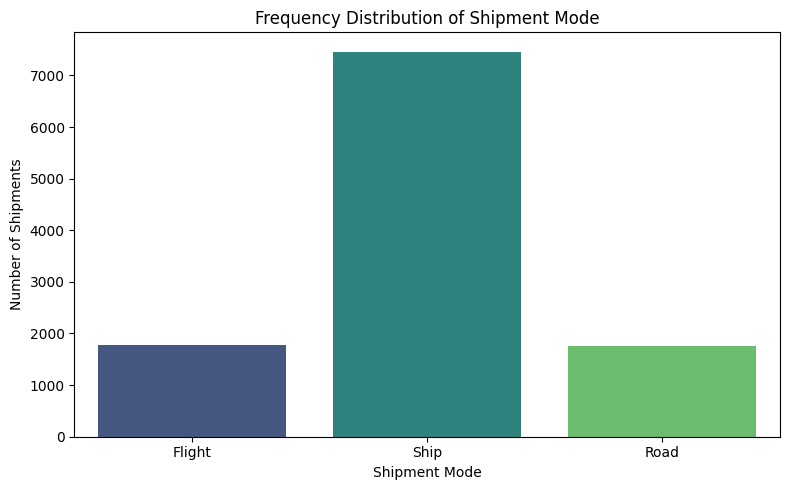

In [ ]:
# prompt: create Countplot (Seaborn): easy-to-interpret frequency breakdown

import matplotlib.pyplot as plt
# Analyze the distribution of 'shipmentmode'
plt.figure(figsize=(8, 5))
sns.countplot(x='shipmentmode', data=merged_df, palette='viridis')
plt.title('Frequency Distribution of Shipment Mode')
plt.xlabel('Shipment Mode')
plt.ylabel('Number of Shipments')
plt.tight_layout()
plt.show()


Generating Pairplot for Numerical Features:


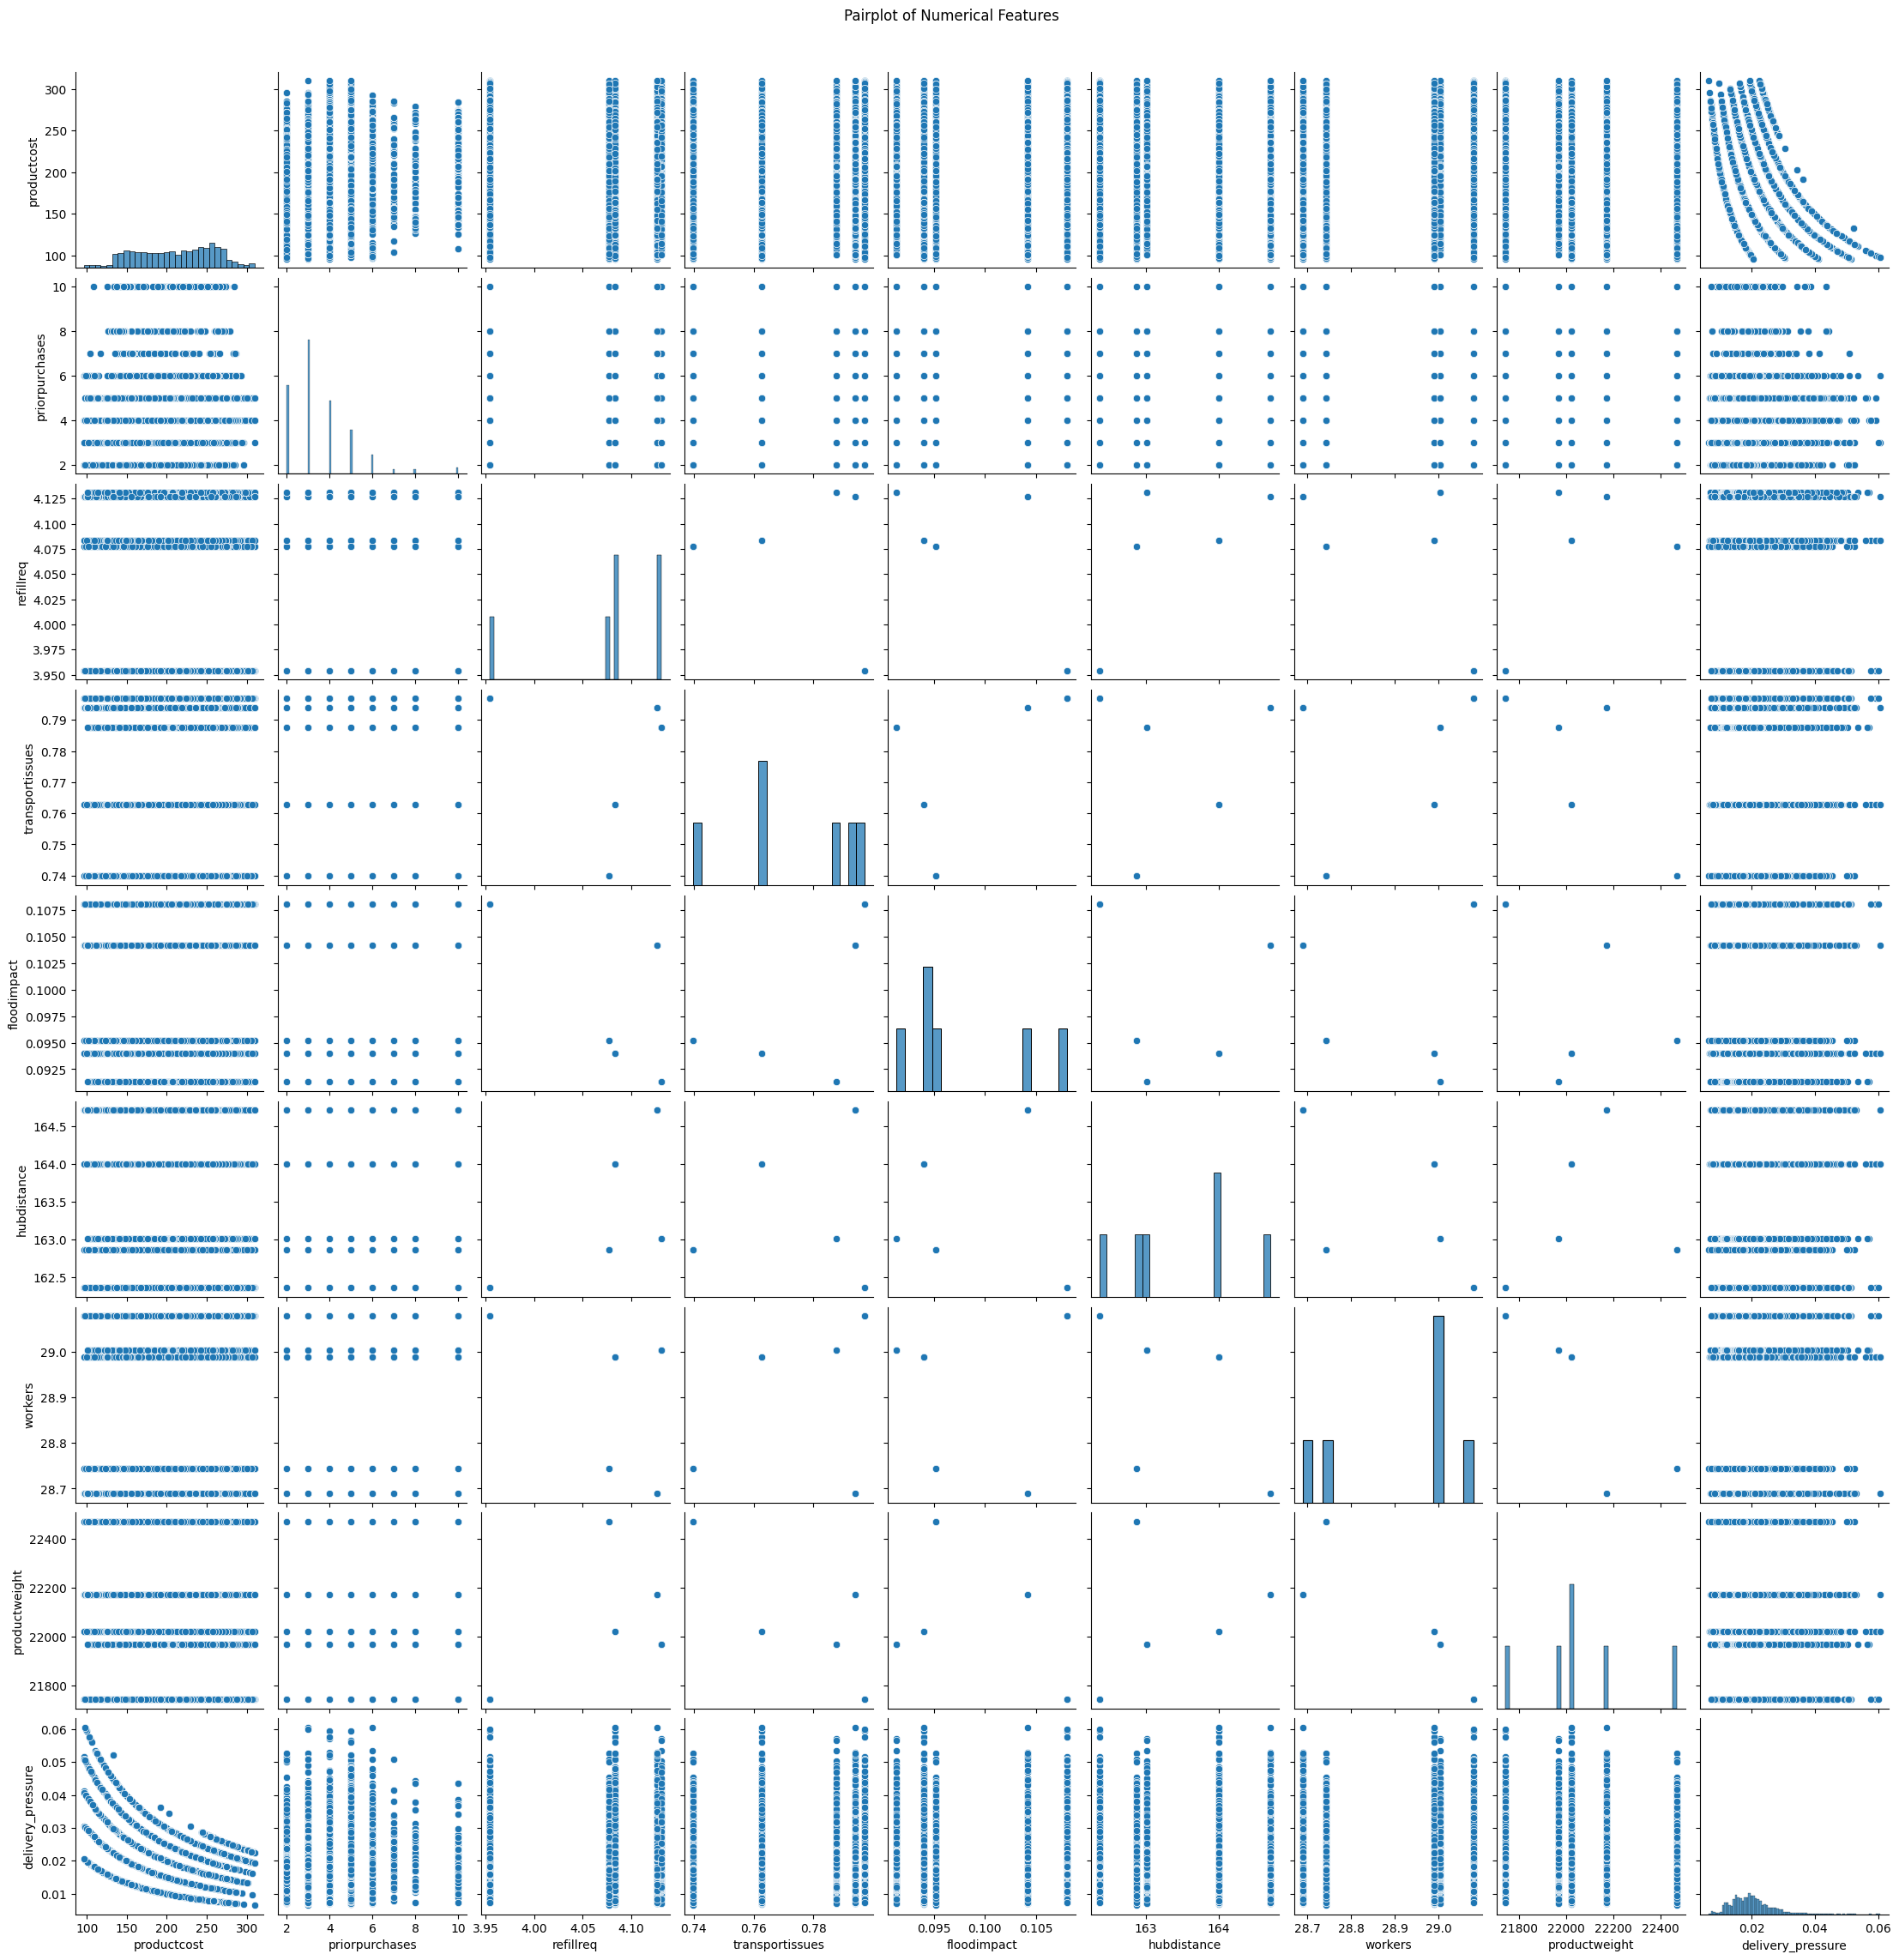

In [ ]:
# prompt: Pairplots for Variable Relationships
# Quickly visualize pairwise relationships between numerical predictors, uncovering correlations or clusters.

import matplotlib.pyplot as plt
# Select only numerical columns for the pairplot
# Ensure you are using the DataFrame that contains the numerical columns you want to visualize
# Based on the previous code, `merged_df` after dropping VIF columns and adding delivery_pressure seems appropriate
# Let's use the numerical columns *after* these steps but *before* one-hot encoding for the pairplot.
# The final 8 numerical features listed in your recap seem like good candidates.
numerical_features_for_pairplot = [
    'productcost',
    'priorpurchases',
    'refillreq',
    'transportissues',
    'floodimpact',
    'hubdistance',
    'workers',
    'productweight',
    'delivery_pressure' # Include the newly created feature
]

# Ensure these columns exist in merged_df
# Create a list of columns that are actually present in the DataFrame
present_numerical_cols = [col for col in numerical_features_for_pairplot if col in merged_df.columns]

if present_numerical_cols:
    print("\nGenerating Pairplot for Numerical Features:")
    # Create the pairplot
    sns.pairplot(merged_df[present_numerical_cols])
    plt.suptitle('Pairplot of Numerical Features', y=1.02) # Add a title
    plt.show()
else:
    print("\nNo numerical columns found for pairplot.")


Generating Violin Plots for Numerical Features:


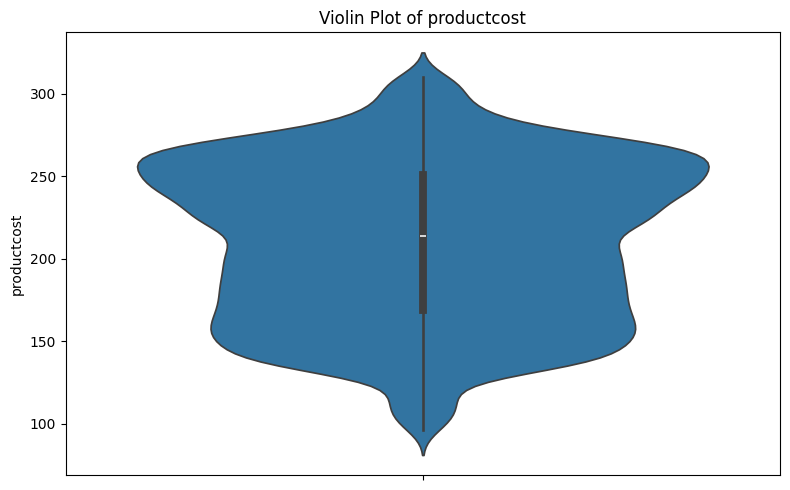

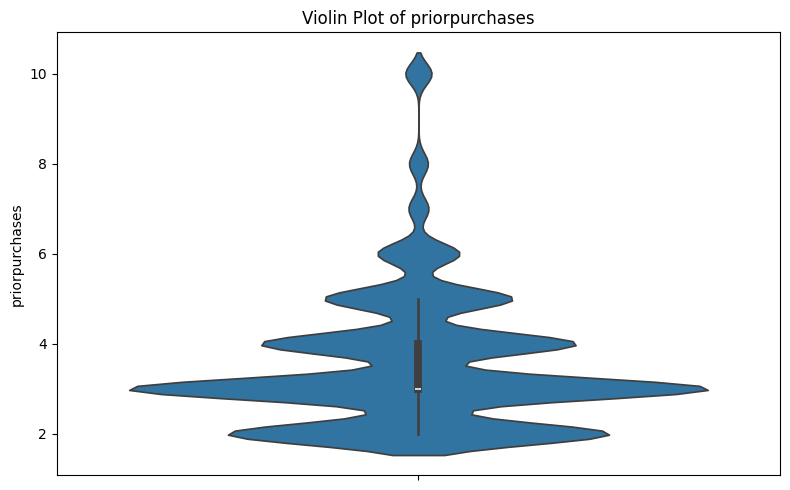

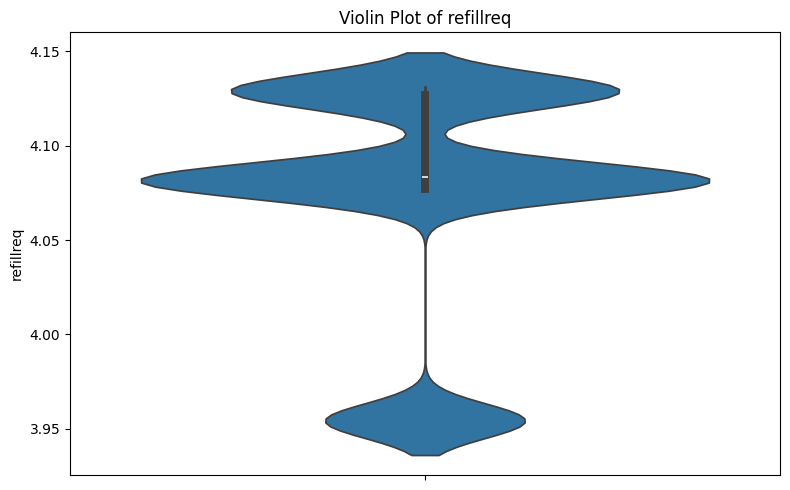

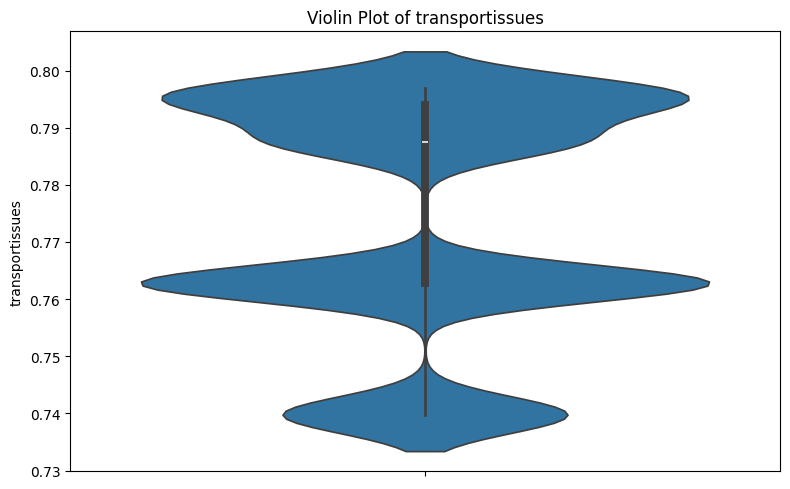

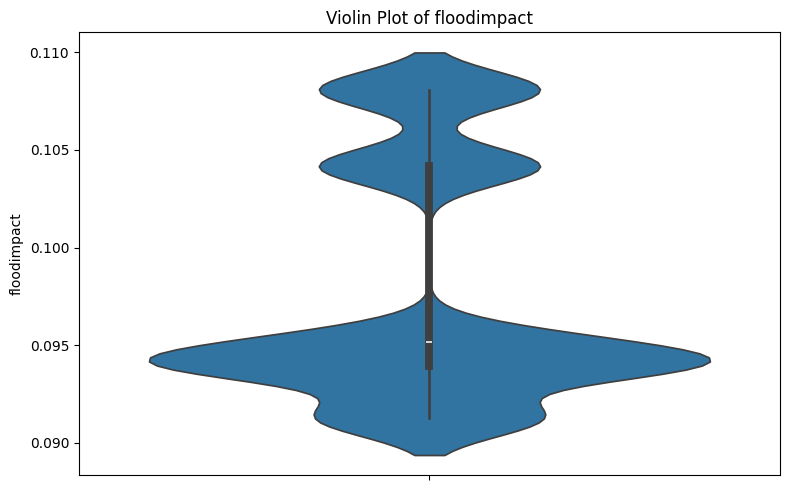

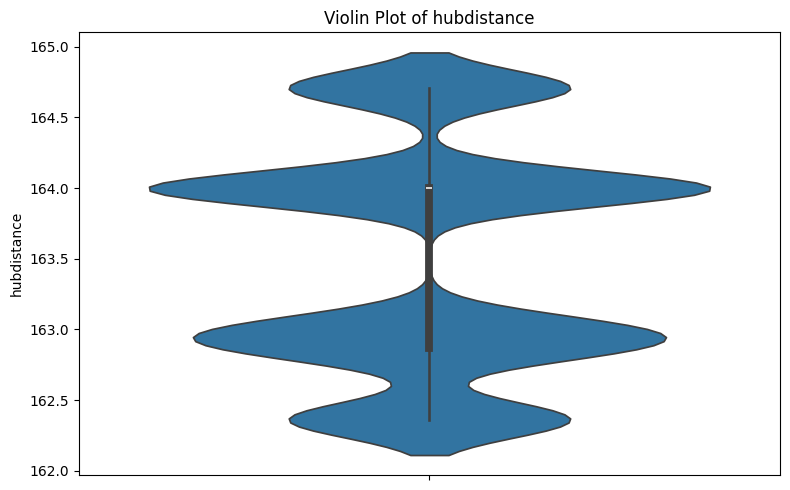

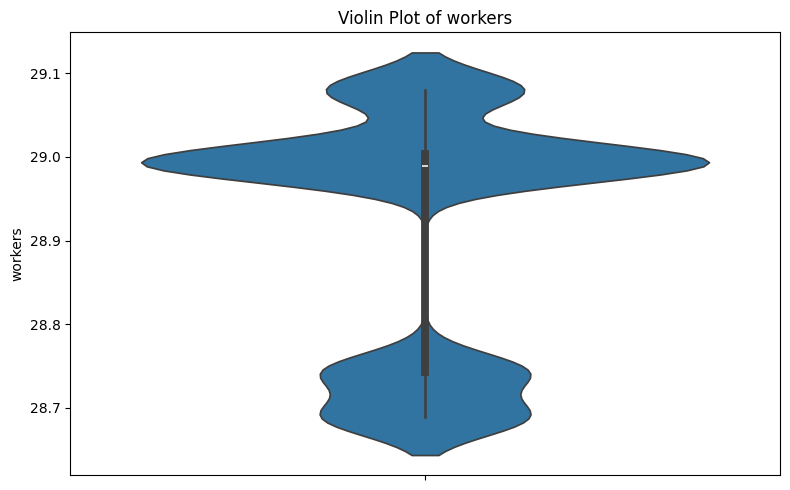

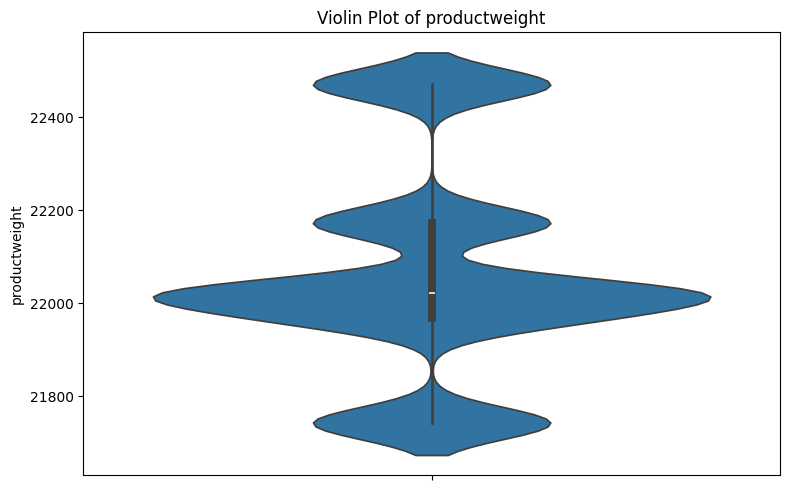

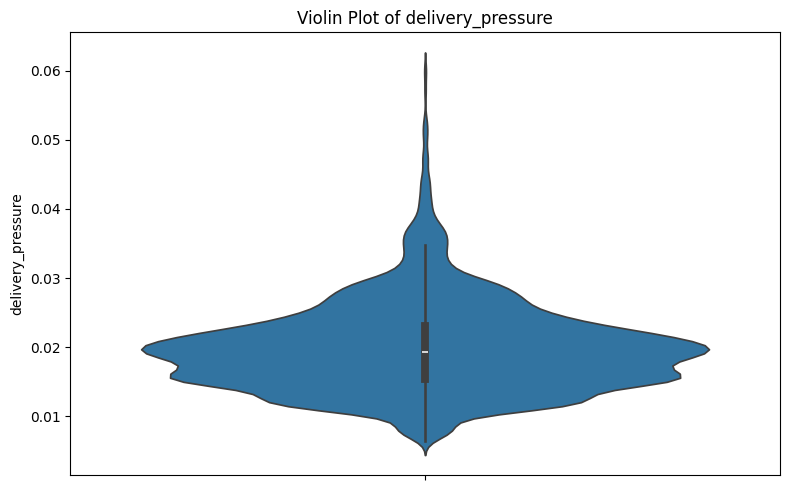


Generating Violin Plots by Target Variable 'latedelivery':


/tmp/ipython-input-55-828342590.py:42: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




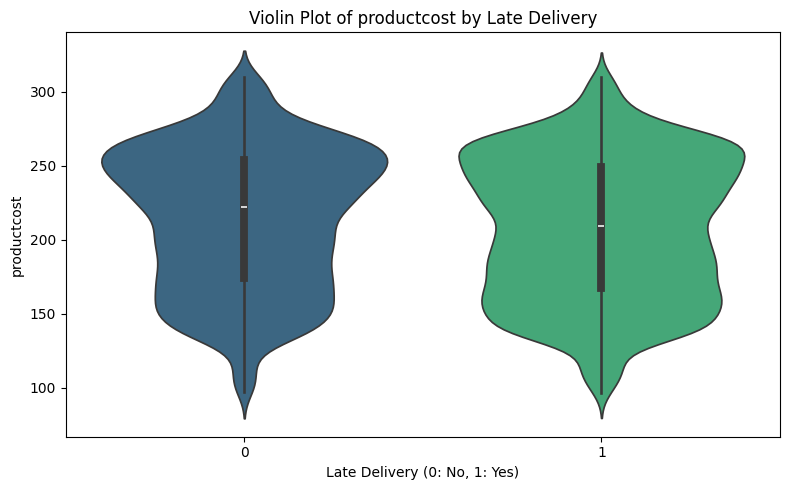

/tmp/ipython-input-55-828342590.py:42: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




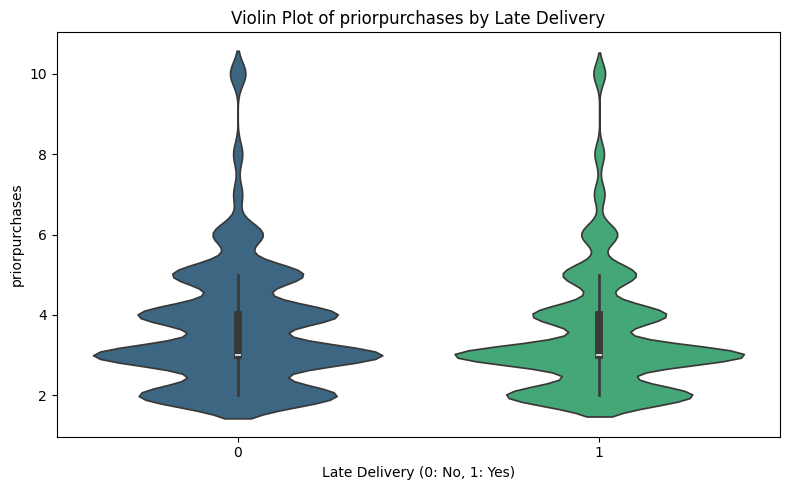

/tmp/ipython-input-55-828342590.py:42: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




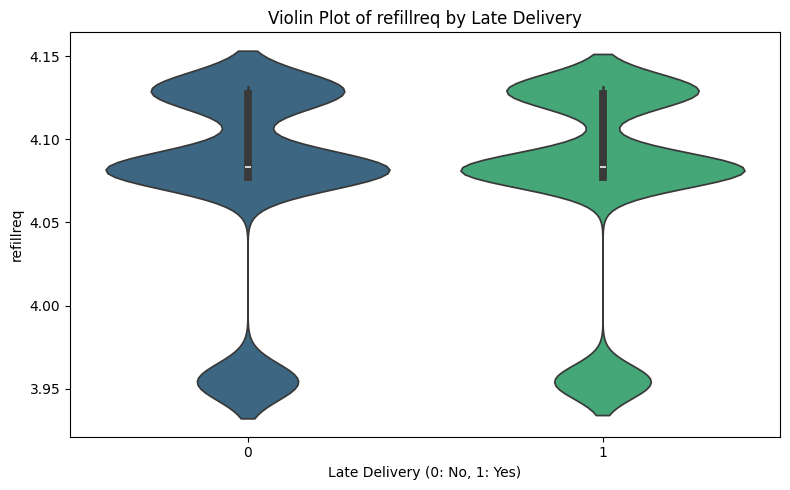

/tmp/ipython-input-55-828342590.py:42: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




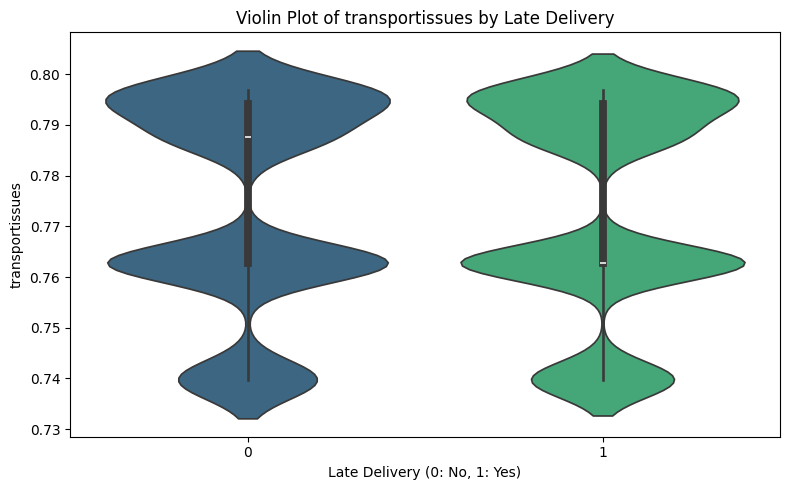

/tmp/ipython-input-55-828342590.py:42: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




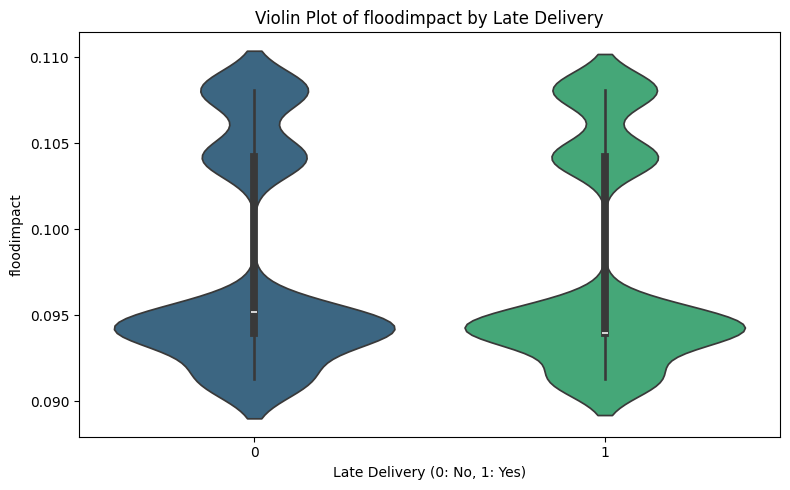

/tmp/ipython-input-55-828342590.py:42: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




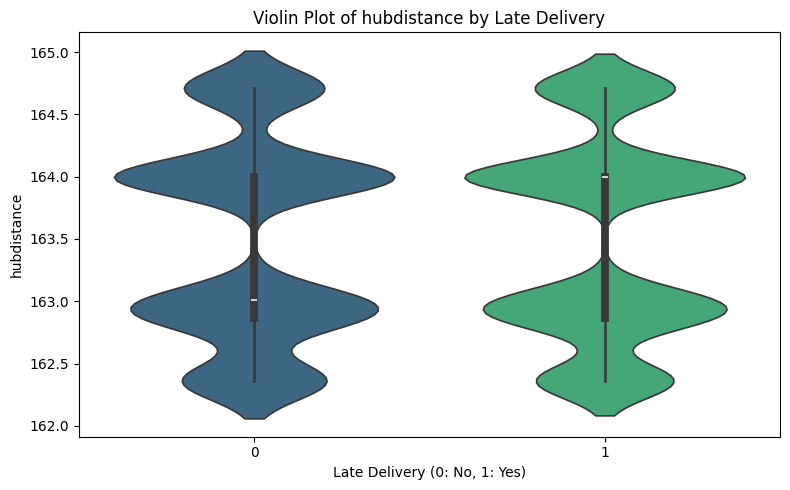

/tmp/ipython-input-55-828342590.py:42: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




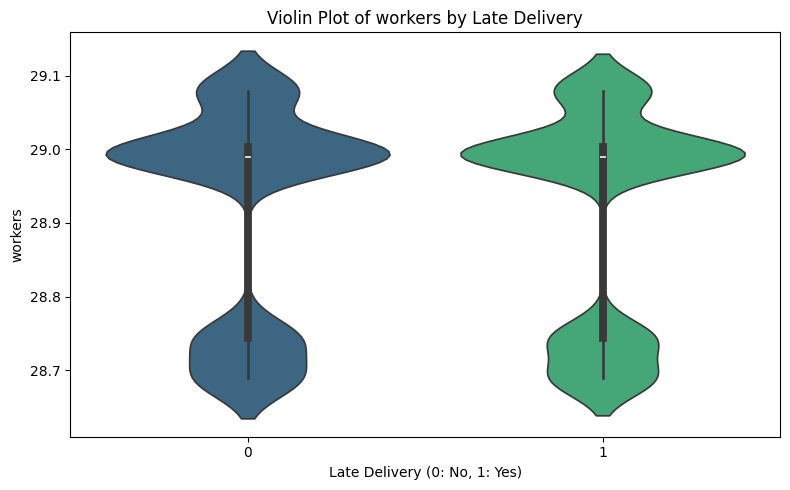

/tmp/ipython-input-55-828342590.py:42: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




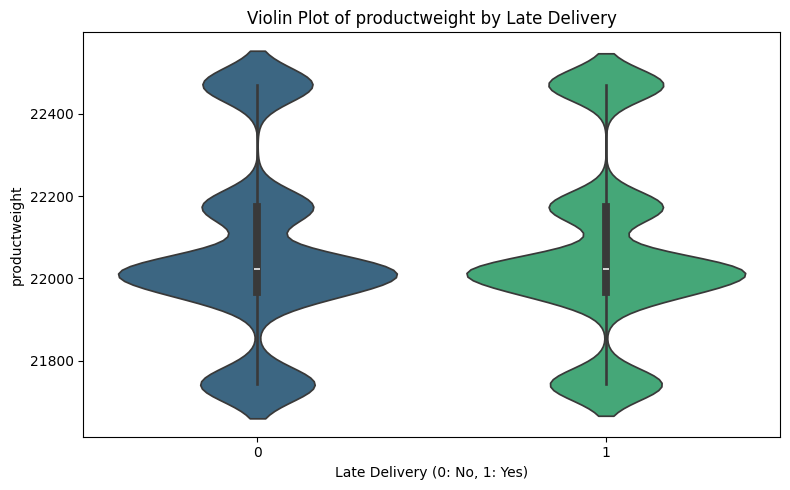

/tmp/ipython-input-55-828342590.py:42: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




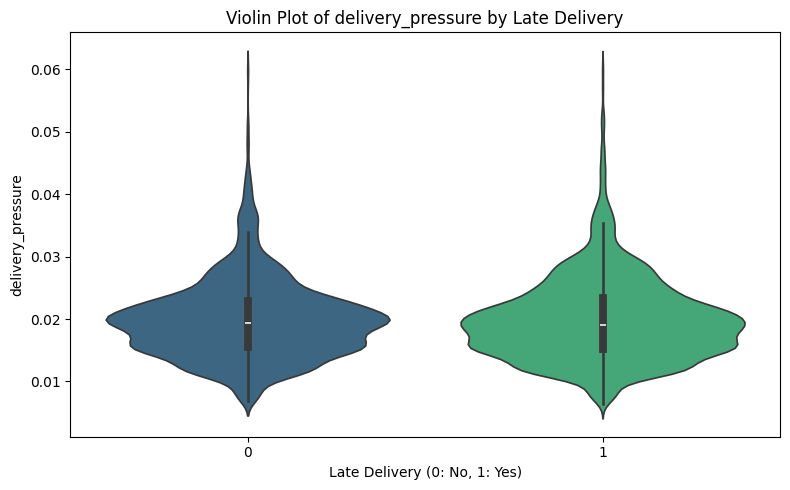

In [ ]:
# prompt: Violin Plots for Detailed Distributions
# Provide deeper insight into the shape and density of data compared to standard histograms.

import matplotlib.pyplot as plt
# EAA
# Visualize numerical features with Violin Plots

# Select numerical columns for violin plots
# Using the same list as for the pairplot seems reasonable
numerical_features_for_violin = [
    'productcost',
    'priorpurchases',
    'refillreq',
    'transportissues',
    'floodimpact',
    'hubdistance',
    'workers',
    'productweight',
    'delivery_pressure'
]

# Ensure these columns exist in merged_df
present_numerical_cols_violin = [col for col in numerical_features_for_violin if col in merged_df.columns]

if present_numerical_cols_violin:
    print("\nGenerating Violin Plots for Numerical Features:")

    # Plot each numerical column as a violin plot
    for col in present_numerical_cols_violin:
        plt.figure(figsize=(8, 5))
        sns.violinplot(y=merged_df[col])
        plt.title(f'Violin Plot of {col}')
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()

    # Optional: Create violin plots colored by the target variable 'latedelivery'
    # This can show how the distribution of a feature differs between the two classes.
    print("\nGenerating Violin Plots by Target Variable 'latedelivery':")
    for col in present_numerical_cols_violin:
        plt.figure(figsize=(8, 5))
        sns.violinplot(x='latedelivery', y=col, data=merged_df, palette='viridis')
        plt.title(f'Violin Plot of {col} by Late Delivery')
        plt.xlabel('Late Delivery (0: No, 1: Yes)')
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()

else:
    print("\nNo numerical columns found for violin plots.")


/tmp/ipython-input-56-1917866499.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




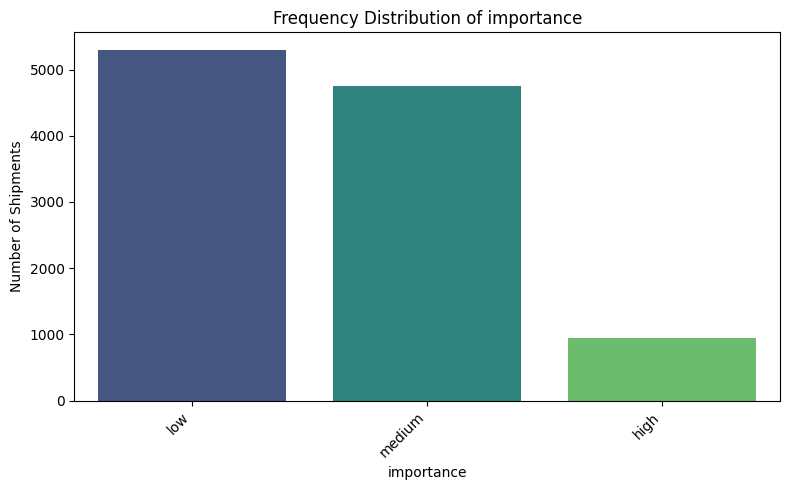

/tmp/ipython-input-56-1917866499.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




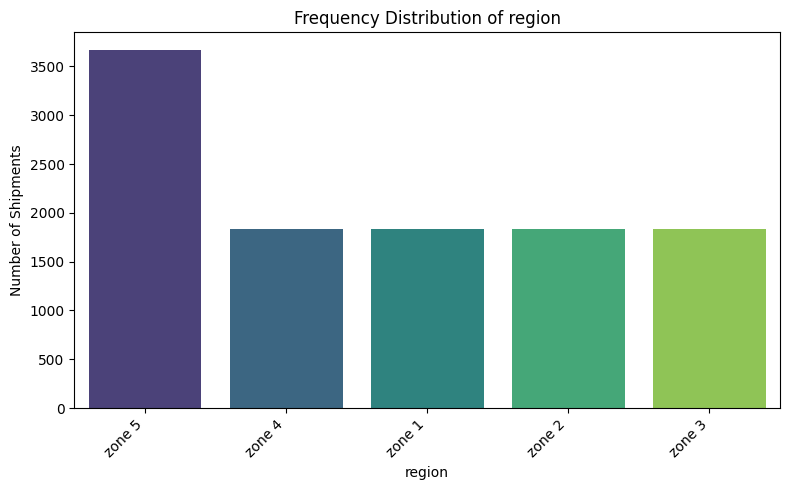

/tmp/ipython-input-56-1917866499.py:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




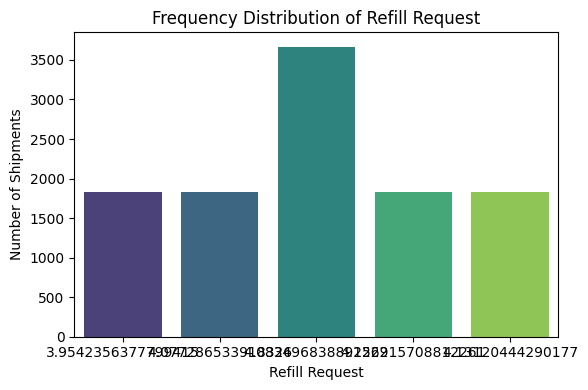

In [ ]:
# prompt: Countplots for Categorical Features
# Clearly display the distribution and frequency of categorical variables (e.g., region, shipment modes).

import matplotlib.pyplot as plt
# Countplots for other categorical features
categorical_features = ['importance', 'region']

for feature in categorical_features:
    if feature in merged_df.columns:
        plt.figure(figsize=(8, 5))
        sns.countplot(x=feature, data=merged_df, palette='viridis', order=merged_df[feature].value_counts().index)
        plt.title(f'Frequency Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Number of Shipments')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print(f"Column '{feature}' not found in DataFrame.")

# Countplot for refillreq (assuming it's treated as categorical)
if 'refillreq' in merged_df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x='refillreq', data=merged_df, palette='viridis')
    plt.title('Frequency Distribution of Refill Request')
    plt.xlabel('Refill Request')
    plt.ylabel('Number of Shipments')
    plt.tight_layout()
    plt.show()
else:
    print("Column 'refillreq' not found in DataFrame.")

/tmp/ipython-input-63-1651718943.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




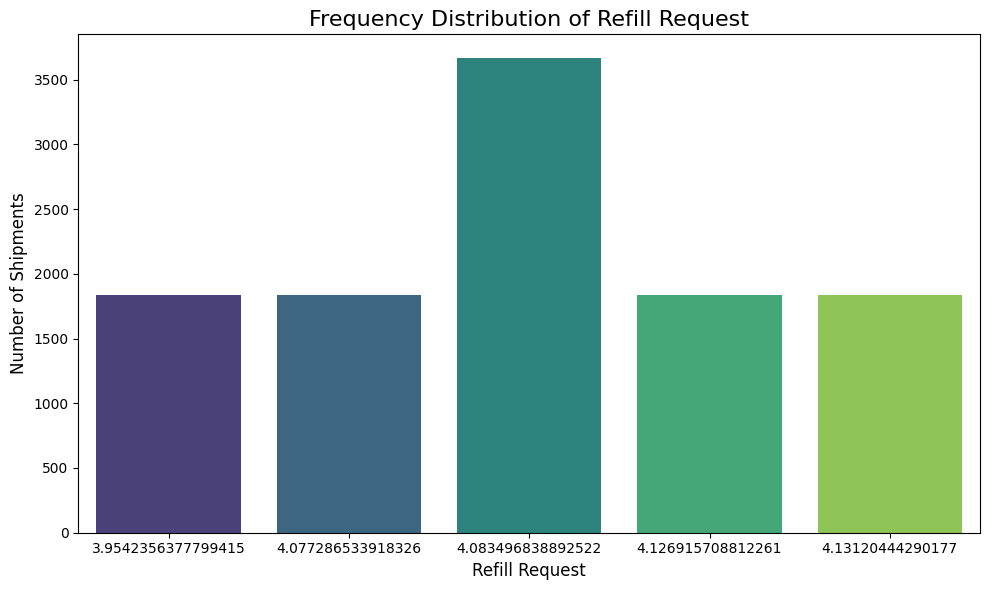

In [ ]:
# prompt: Frequency Distribution of Refill Request larger visualization than last production

import matplotlib.pyplot as plt
# Countplot for refillreq (assuming it's treated as categorical)
if 'refillreq' in merged_df.columns:
    plt.figure(figsize=(10, 6)) # Increased figure size
    sns.countplot(x='refillreq', data=merged_df, palette='viridis')
    plt.title('Frequency Distribution of Refill Request', fontsize=16) # Larger title font
    plt.xlabel('Refill Request', fontsize=12) # Larger xlabel font
    plt.ylabel('Number of Shipments', fontsize=12) # Larger ylabel font
    plt.xticks(fontsize=10) # Larger x-axis ticks font
    plt.yticks(fontsize=10) # Larger y-axis ticks font
    plt.tight_layout()
    plt.show()
else:
    print("Column 'refillreq' not found in DataFrame.")



Class Balance (0: On-Time, 1: Late):
latedelivery
1    6563
0    4436
Name: count, dtype: int64
Late Deliveries: 59.67%
Timely Deliveries: 40.33%


/tmp/ipython-input-57-1869336385.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




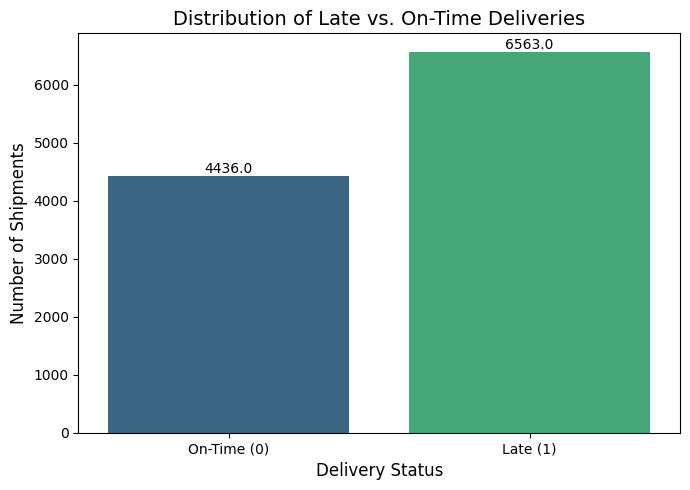

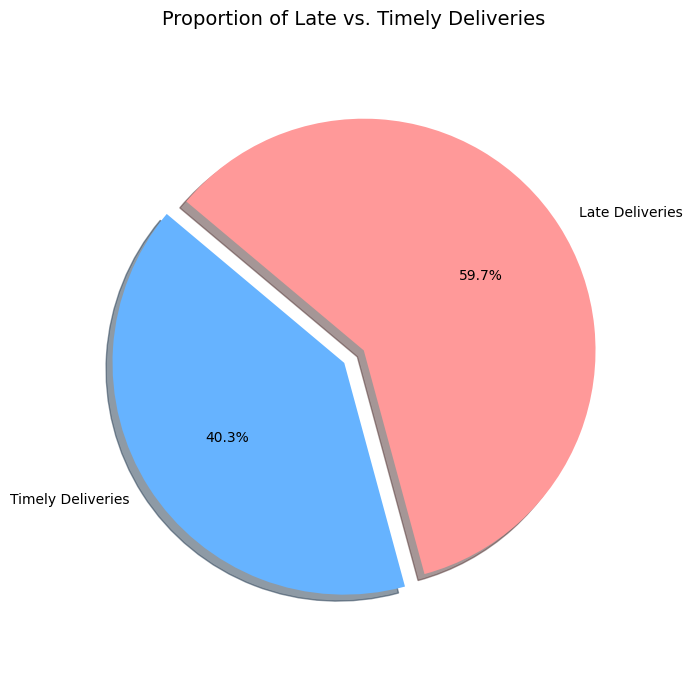

In [ ]:
# prompt: Bar Plot and Countplot for Target Variable Analysis (Target = latedelivery)
# Highlight class imbalance and frequency of late versus on-time deliveries clearly, supporting predictive model justification.

import matplotlib.pyplot as plt
# Analyze the class balance of the target variable 'latedelivery'
class_balance = merged_df['latedelivery'].value_counts()
print("\nClass Balance (0: On-Time, 1: Late):")
print(class_balance)

# Calculate percentages
total_deliveries = class_balance.sum()
late_percentage = (class_balance.get(1, 0) / total_deliveries) * 100 if total_deliveries > 0 else 0
timely_percentage = (class_balance.get(0, 0) / total_deliveries) * 100 if total_deliveries > 0 else 0

print(f"Late Deliveries: {late_percentage:.2f}%")
print(f"Timely Deliveries: {timely_percentage:.2f}%")


# Create a bar plot for class balance
plt.figure(figsize=(7, 5))
ax = sns.countplot(x='latedelivery', data=merged_df, palette='viridis')

# Add titles and labels
plt.title('Distribution of Late vs. On-Time Deliveries', fontsize=14)
plt.xlabel('Delivery Status', fontsize=12)
plt.ylabel('Number of Shipments', fontsize=12)
plt.xticks([0, 1], ['On-Time (0)', 'Late (1)']) # Label the x-axis ticks

# Add frequency counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)

plt.tight_layout()
plt.show()

# Create data for the pie chart
labels = ['Timely Deliveries', 'Late Deliveries']
# Ensure we handle cases where one class might be missing
sizes = [class_balance.get(0, 0), class_balance.get(1, 0)]
colors = ['#66b3ff', '#ff9999'] # Updated colors for contrast
explode = (0, 0.1)  # Explode the 'Late Deliveries' slice for emphasis

# Create the pie chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.title('Proportion of Late vs. Timely Deliveries', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()



Generating Scatter Plots for Correlation Analysis (Numerical Features):


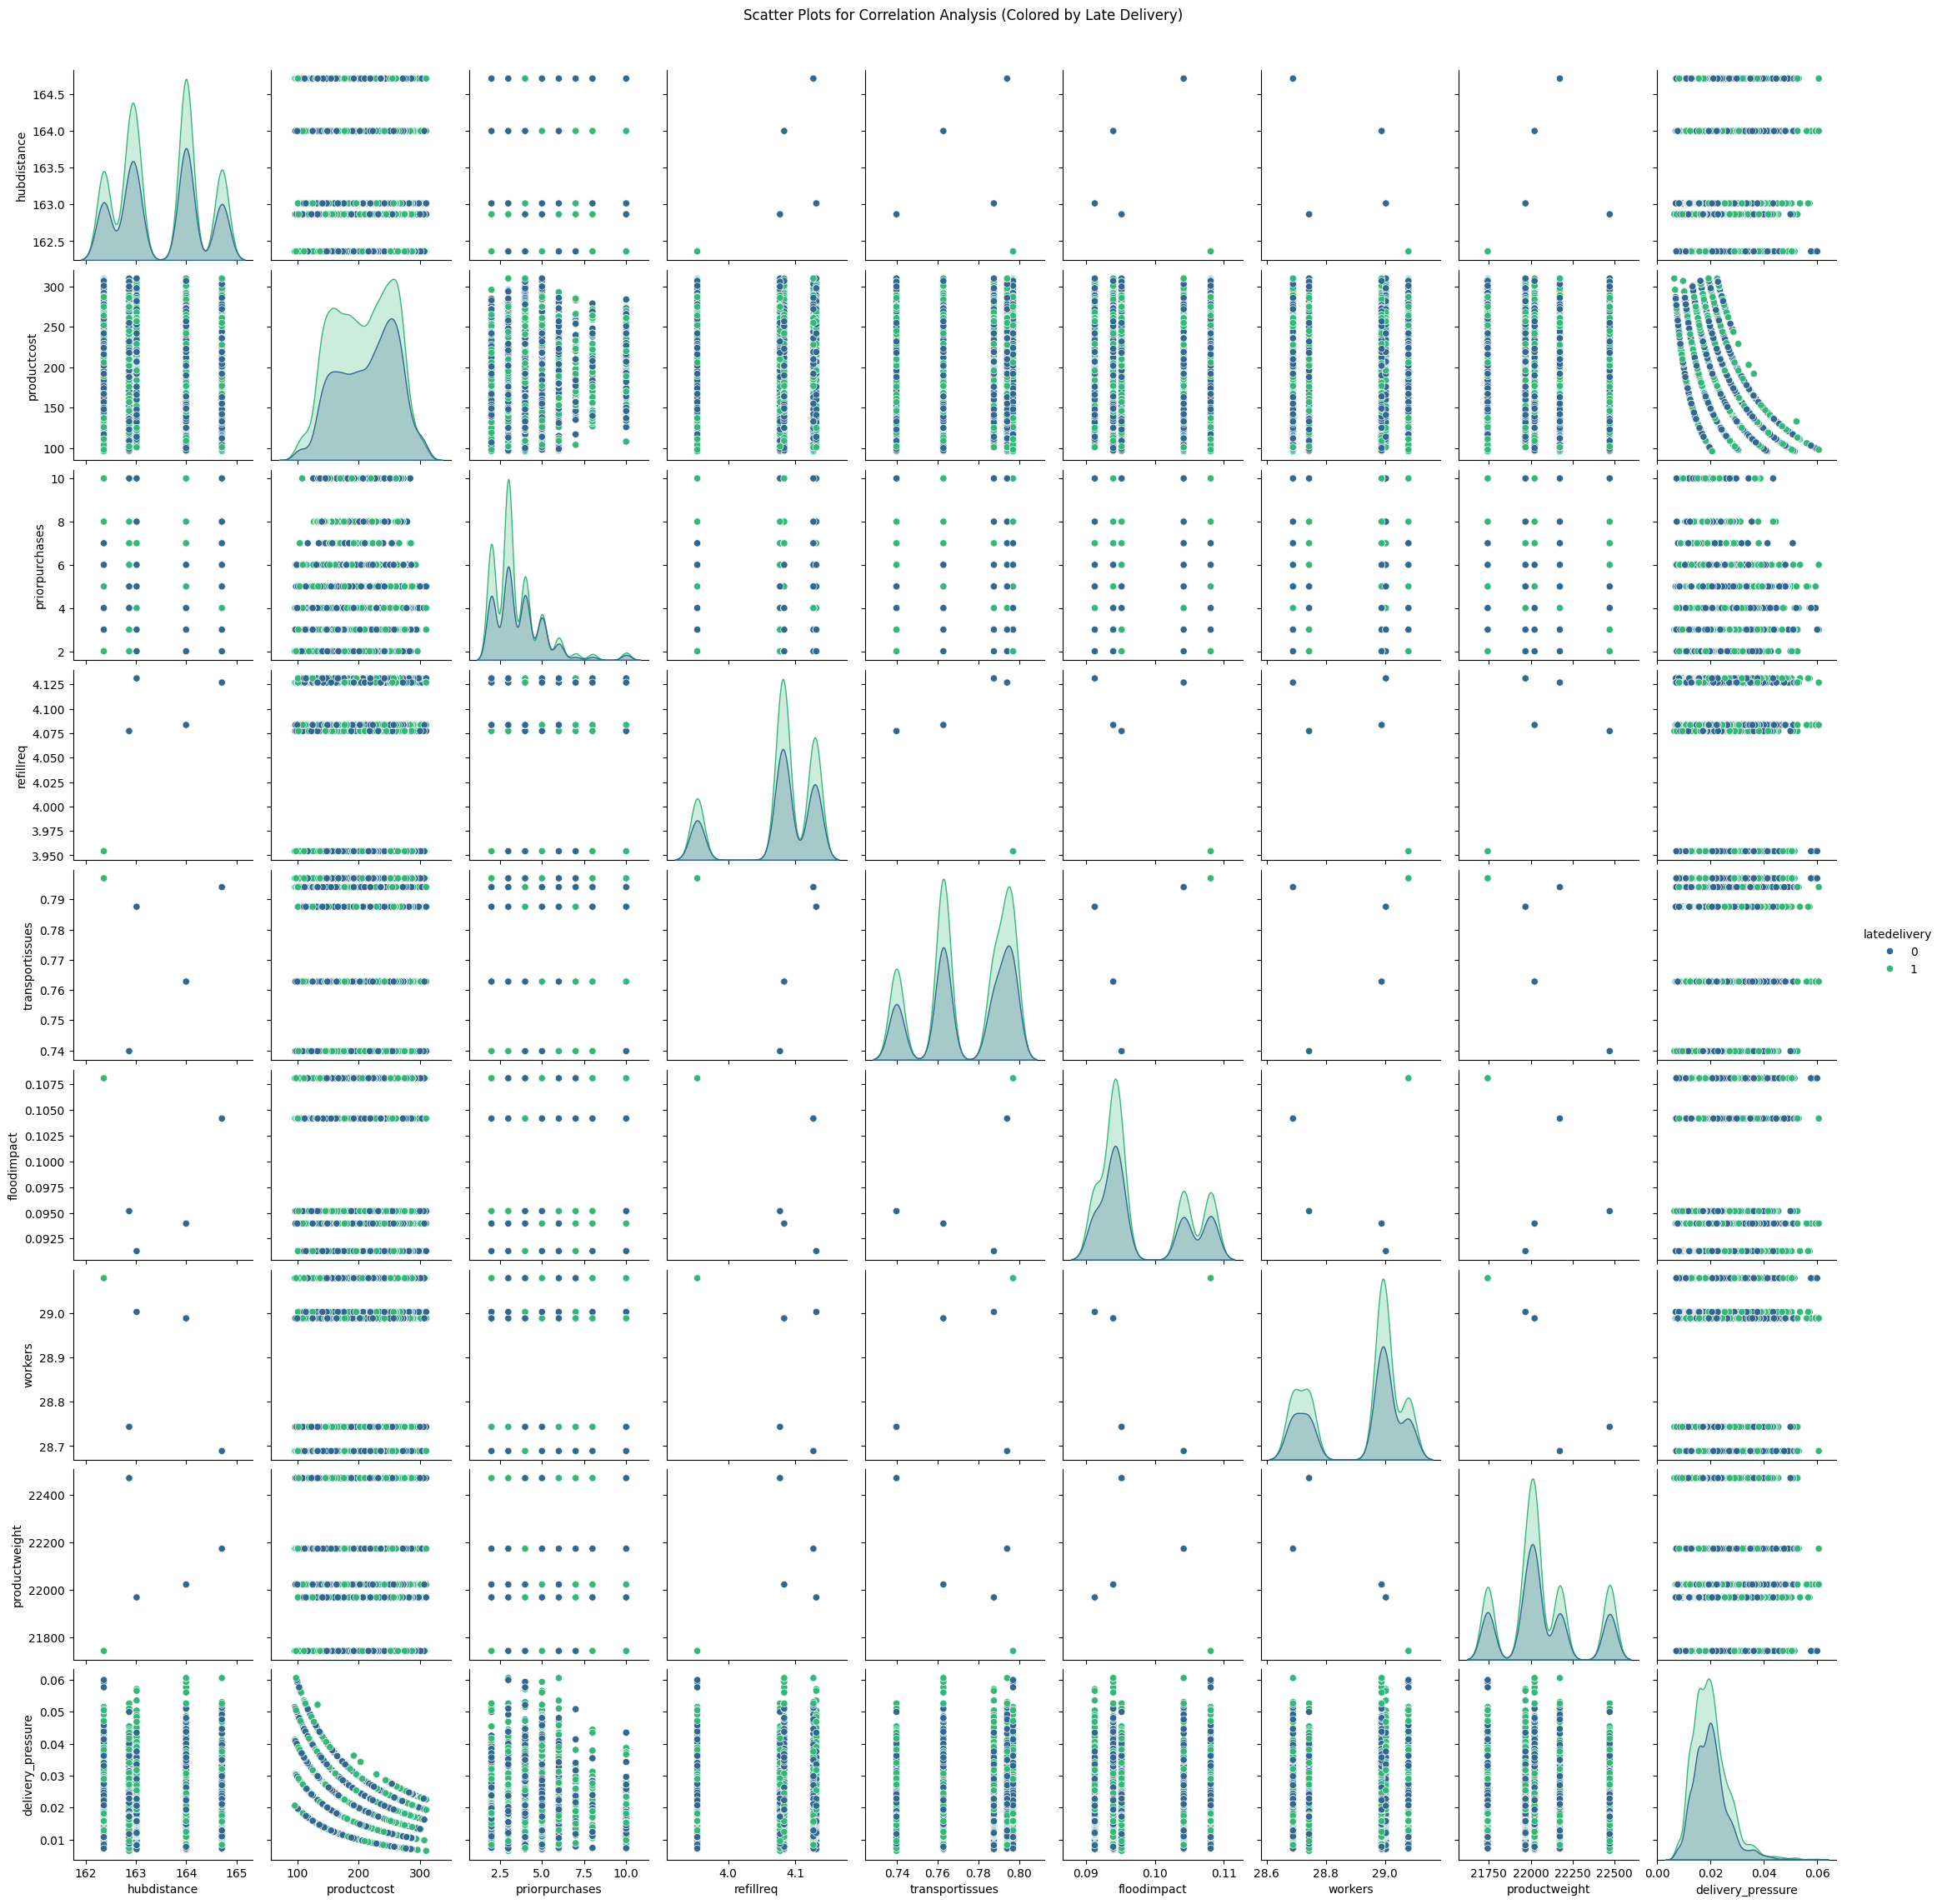

In [ ]:
# prompt: Scatter Plots for Correlation Analysis
# Show potential predictive relationships clearly, especially useful for continuous predictors like hubdistance or productcost. (in a panel like visualization

import matplotlib.pyplot as plt
# Select numerical features for scatter plots
# Using the same list as for the pairplot seems reasonable
numerical_features_for_scatter = [
    'hubdistance',
    'productcost',
    'priorpurchases',
    'refillreq',
    'transportissues',
    'floodimpact',
    'workers',
    'productweight',
    'delivery_pressure'
]

# Ensure these columns exist in merged_df
present_numerical_cols_scatter = [col for col in numerical_features_for_scatter if col in merged_df.columns]

if present_numerical_cols_scatter:
    print("\nGenerating Scatter Plots for Correlation Analysis (Numerical Features):")

    # Create a pairplot which generates scatter plots for all pairs of features
    # We can color-code points by the target variable 'latedelivery' to see if it separates the groups
    # Set 'diag_kind' to 'hist' or 'kde' to show distributions on the diagonal
    sns.pairplot(
        merged_df[present_numerical_cols_scatter + ['latedelivery']],
        hue='latedelivery', # Color points based on the target variable
        palette='viridis',  # Color scheme
        diag_kind='kde'     # Show Kernel Density Estimate plots on the diagonal
    )
    plt.suptitle('Scatter Plots for Correlation Analysis (Colored by Late Delivery)', y=1.02) # Add a title
    plt.show()

else:
    print("\nNo numerical columns found for scatter plots.")

In [ ]:
# prompt: Line Plot for Trends or Time-Based Patterns
# Identify trends or seasonal patterns if timestamped data is available, valuable for logistics and inventory planning.

import pandas as pd
import matplotlib.pyplot as plt
# Ensure the 'deliverydate' column is in datetime format
# Assuming 'deliverydate' is present in your merged_df
if 'deliverydate' in merged_df.columns:
    try:
        merged_df['deliverydate'] = pd.to_datetime(merged_df['deliverydate'])

        # Aggregate data by date to see trends
        # For example, count the number of late deliveries per day
        daily_trends = merged_df.groupby(merged_df['deliverydate'].dt.date)['latedelivery'].agg(['count', 'sum']).reset_index()
        daily_trends.columns = ['DeliveryDate', 'TotalDeliveries', 'LateDeliveries']
        daily_trends['OnTimeDeliveries'] = daily_trends['TotalDeliveries'] - daily_trends['LateDeliveries']

        # Sort by date for proper line plotting
        daily_trends['DeliveryDate'] = pd.to_datetime(daily_trends['DeliveryDate'])
        daily_trends = daily_trends.sort_values('DeliveryDate')

        print("\nDaily Delivery Trends:")
        print(daily_trends.head())

        # Plotting trends over time
        plt.figure(figsize=(12, 6))
        plt.plot(daily_trends['DeliveryDate'], daily_trends['TotalDeliveries'], marker='o', linestyle='-', label='Total Deliveries')
        plt.plot(daily_trends['DeliveryDate'], daily_trends['LateDeliveries'], marker='o', linestyle='-', label='Late Deliveries', color='red')
        plt.plot(daily_trends['DeliveryDate'], daily_trends['OnTimeDeliveries'], marker='o', linestyle='-', label='On-Time Deliveries', color='green')

        plt.title('Delivery Trends Over Time')
        plt.xlabel('Date')
        plt.ylabel('Number of Shipments')
        plt.xticks(rotation=45)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # Optional: Plot the percentage of late deliveries over time
        daily_trends['LatePercentage'] = (daily_trends['LateDeliveries'] / daily_trends['TotalDeliveries']) * 100
        plt.figure(figsize=(12, 6))
        plt.plot(daily_trends['DeliveryDate'], daily_trends['LatePercentage'], marker='o', linestyle='-', color='purple')
        plt.title('Percentage of Late Deliveries Over Time')
        plt.xlabel('Date')
        plt.ylabel('Percentage Late (%)')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.tight_layout()
        plt.show()


    except Exception as e:
        print(f"Error processing 'deliverydate' column: {e}")
        print("Please ensure the 'deliverydate' column exists and is in a parseable format.")
else:
    print("'deliverydate' column not found in the merged DataFrame. Cannot plot time-based trends.")



'deliverydate' column not found in the merged DataFrame. Cannot plot time-based trends.


/tmp/ipython-input-60-2840645565.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




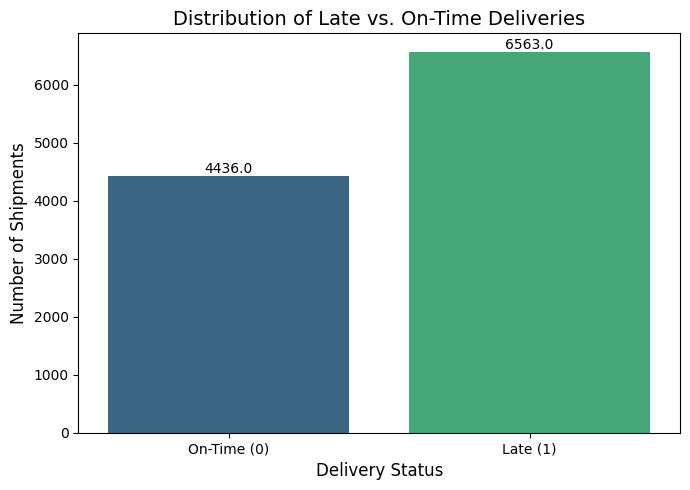

In [ ]:
# prompt: Bar Plot of the Target Variable (latedelivery)

import matplotlib.pyplot as plt
# Analyze the class balance of the target variable 'latedelivery'
class_balance = merged_df['latedelivery'].value_counts()

# Create a bar plot for class balance
plt.figure(figsize=(7, 5))
ax = sns.countplot(x='latedelivery', data=merged_df, palette='viridis')

# Add titles and labels
plt.title('Distribution of Late vs. On-Time Deliveries', fontsize=14)
plt.xlabel('Delivery Status', fontsize=12)
plt.ylabel('Number of Shipments', fontsize=12)
plt.xticks([0, 1], ['On-Time (0)', 'Late (1)']) # Label the x-axis ticks

# Add frequency counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)

plt.tight_layout()
plt.show()



Mean Feature Values by Delivery Status:
                        On-Time          Late
productweight      22064.427634  22068.236235
hubdistance          163.486658    163.494196
refillreq              4.075560      4.076483
delivery_pressure      0.019944      0.019982
floodimpact            0.097826      0.097737
transportissues        0.774190      0.773881
workers               28.916536     28.914755
priorpurchases         3.670424      3.498095
productcost          214.498647    207.289197


<Figure size 1200x800 with 0 Axes>

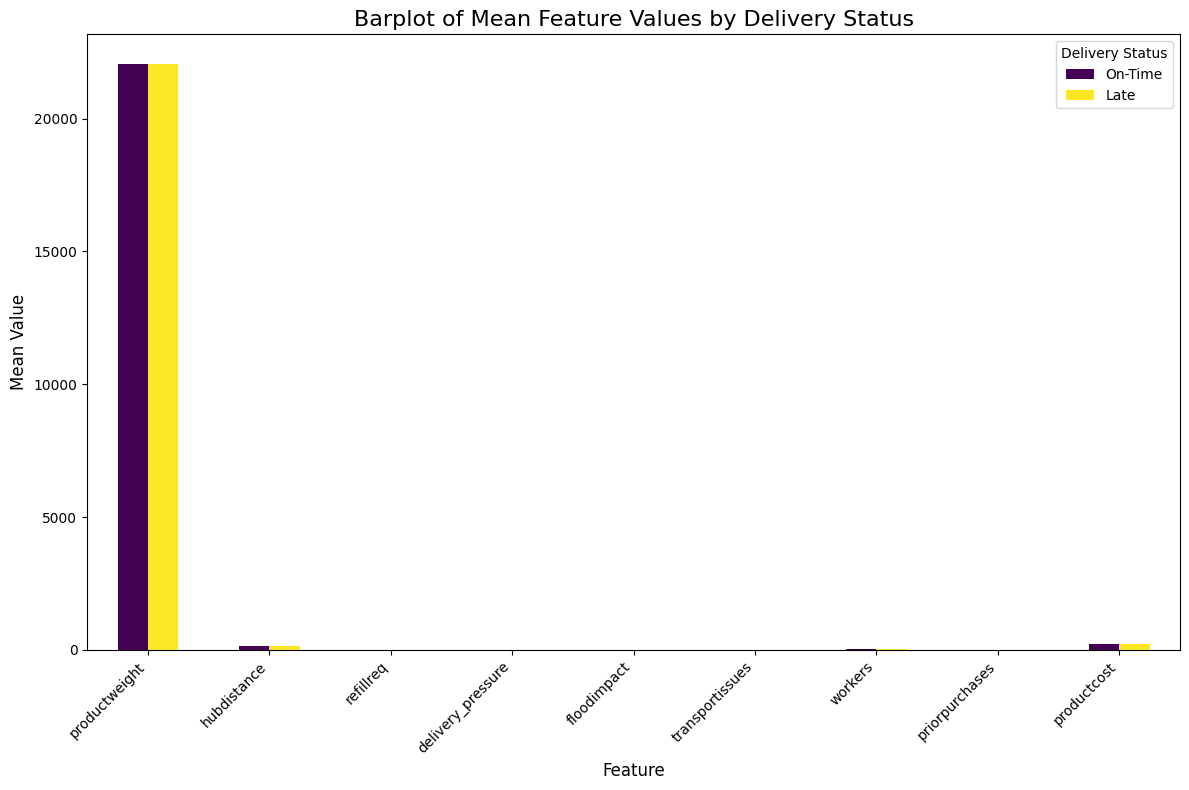

In [ ]:
# prompt: Barplot of Mean Feature Values by Class

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Recreate merged_df based on the previous steps in the notebook
# Load the E-Commerce dataset
ec = pd.read_csv('/content/ec.csv')
# Load the FMCG dataset
fmcg = pd.read_csv('/content/fmgc.csv')

# Outer Join on Cleaned Keys + Merge Key Creation (as in cell 0v_n639KueHg)
block_region_map = {
    'a': 'zone 1',
    'b': 'zone 2',
    'c': 'zone 3',
    'd': 'zone 4',
    'f': 'zone 5'
}

# Clean and map
ec['warehouseblock'] = ec['warehouseblock'].astype(str).str.strip().str.lower()
ec['region'] = ec['warehouseblock'].map(block_region_map)

# Also clean FMCG regions
fmcg['region'] = fmcg['region'].astype(str).str.strip().str.lower()

# Aggregate FMCG by region
fmcg_numeric_cols = fmcg.select_dtypes(include=np.number).columns.tolist()
fmcg_cols_to_agg = ['region'] + fmcg_numeric_cols
fmcg_for_agg = fmcg[fmcg_cols_to_agg]
fmcg_agg = fmcg_for_agg.groupby('region').mean().reset_index()

# Merge on region
merged_df = pd.merge(ec, fmcg_agg, on='region', how='left')

# Drop orderid column (as in cell ju2-wU0Jxntr)
if 'orderid' in merged_df.columns:
    merged_df = merged_df.drop('orderid', axis=1)

# Drop multicollinear columns (as in cell zCIJajzq6LnK)
cols_to_drop = [
    'storageissues',
    'govtchecks',
    'breakdowns',
    'floodproof',
    'estyear'
]
merged_df = merged_df.drop(columns=cols_to_drop)

# Create additional feature: delivery_pressure (as in cell V2g07vjSB3iD)
merged_df['delivery_pressure'] = merged_df['carecalls'] / (merged_df['productcost'] + 1)

# Select numerical features for violin plots (as defined in cell dB9piCLOcdSj)
numerical_features_for_violin = [
    'productcost',
    'priorpurchases',
    'refillreq',
    'transportissues',
    'floodimpact',
    'hubdistance',
    'workers',
    'productweight',
    'delivery_pressure'
]

# Ensure these columns exist in merged_df
present_numerical_cols_violin = [col for col in numerical_features_for_violin if col in merged_df.columns]


# Calculate the mean of numerical features for each class
mean_features_by_class = merged_df.groupby('latedelivery')[present_numerical_cols_violin].mean().T

# Rename columns for clarity (0: On-Time, 1: Late)
mean_features_by_class.columns = ['On-Time', 'Late']

# Sort features by the mean difference between classes for better visualization (optional)
mean_features_by_class['Difference'] = mean_features_by_class['Late'] - mean_features_by_class['On-Time']
mean_features_by_class = mean_features_by_class.sort_values('Difference', ascending=False)
mean_features_by_class = mean_features_by_class.drop('Difference', axis=1) # Drop the difference column before plotting


print("\nMean Feature Values by Delivery Status:")
print(mean_features_by_class)

# Plot the bar chart
plt.figure(figsize=(12, 8))
mean_features_by_class.plot(kind='bar', figsize=(12, 8), colormap='viridis')

plt.title('Barplot of Mean Feature Values by Delivery Status', fontsize=16)
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Mean Value', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate labels for readability
plt.legend(title='Delivery Status')
plt.tight_layout()
plt.show()


Generating Boxplots for Numerical Features by Late Delivery:


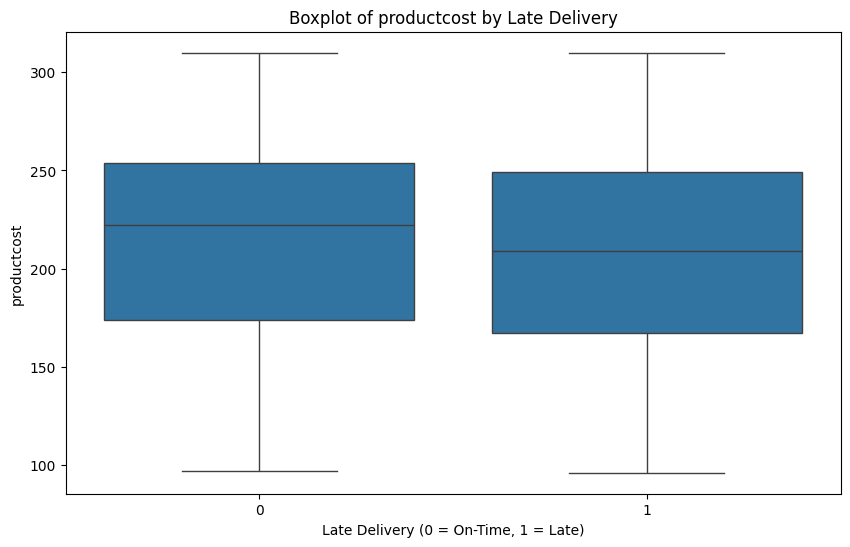

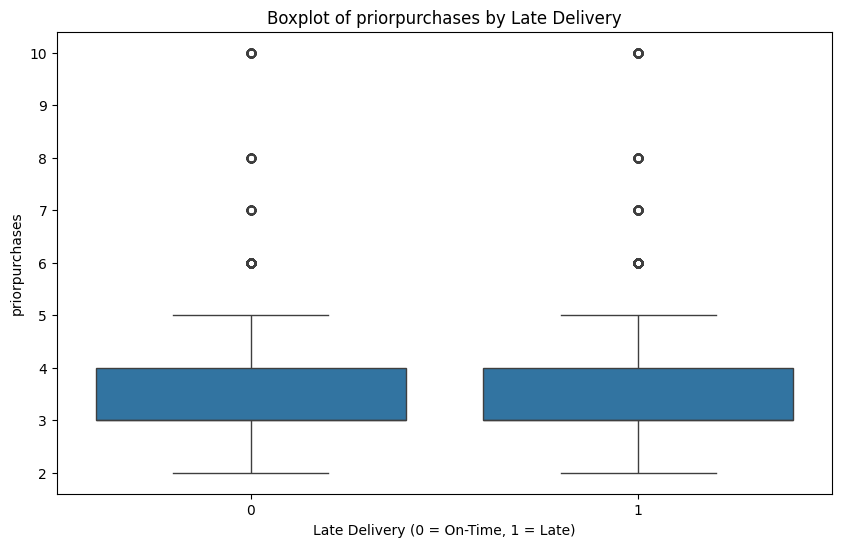

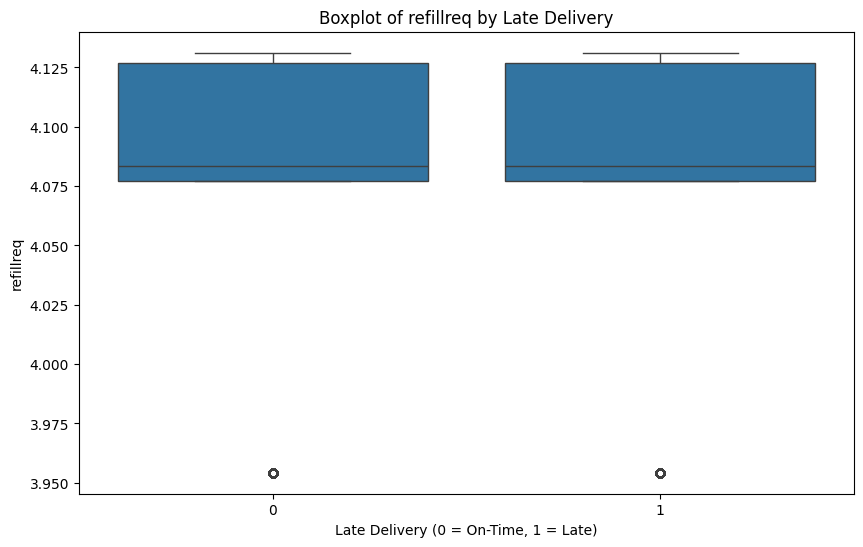

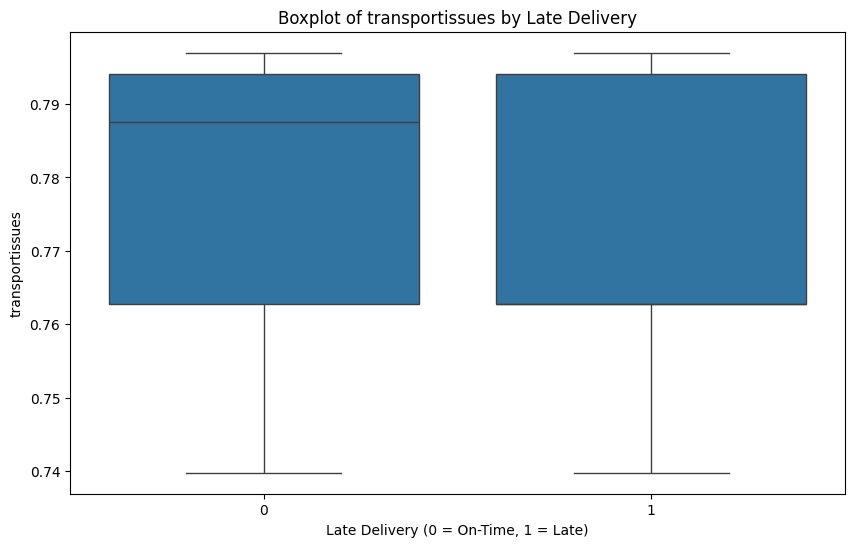

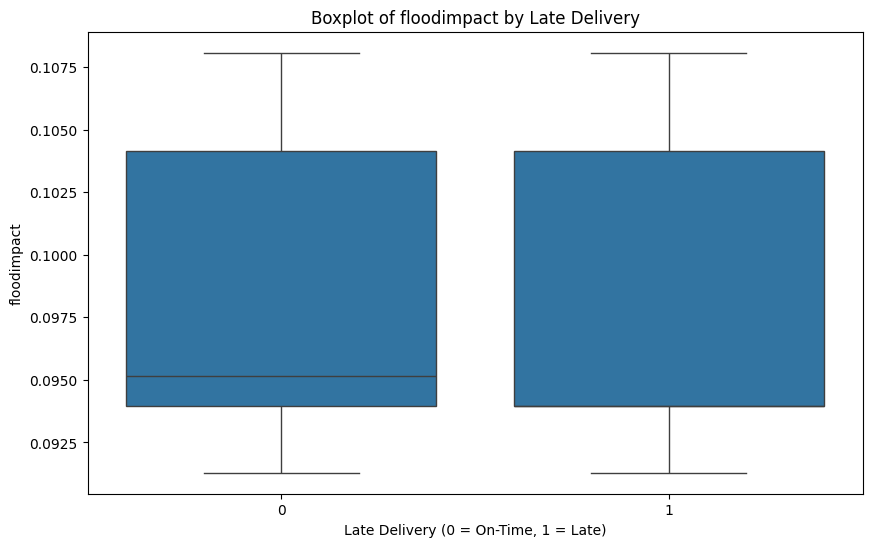

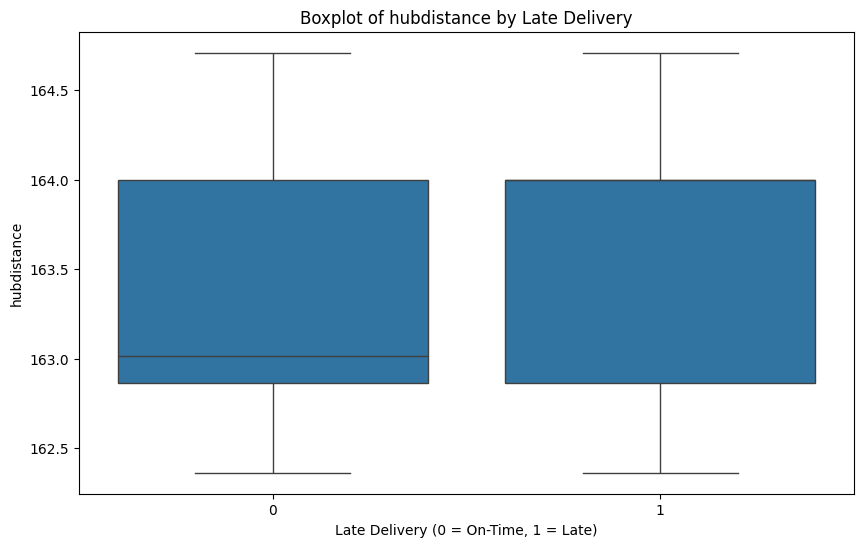

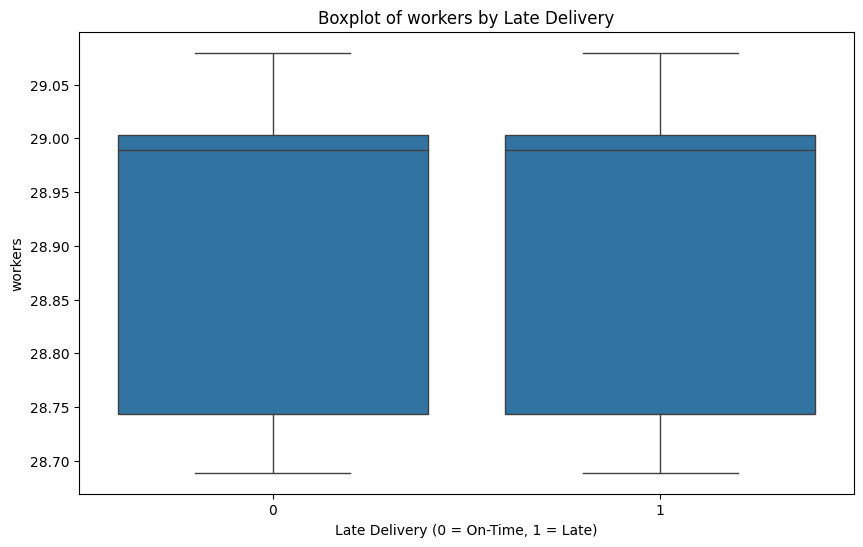

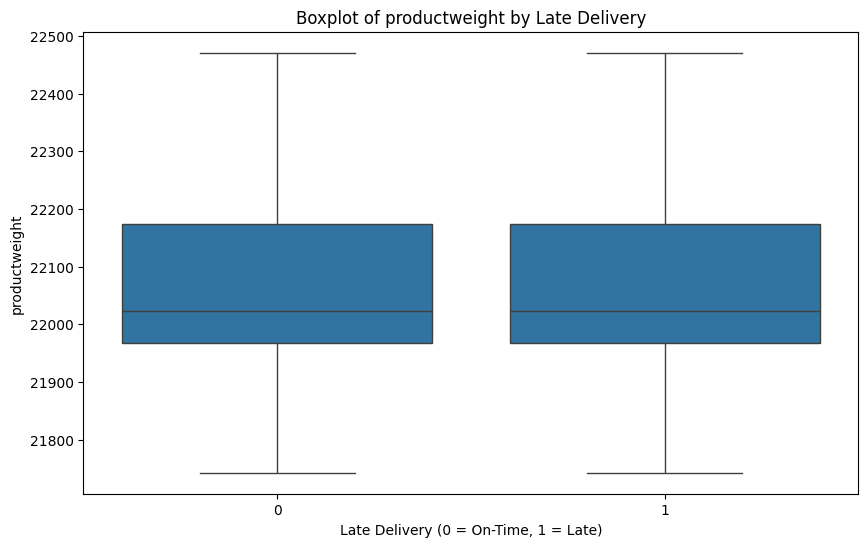

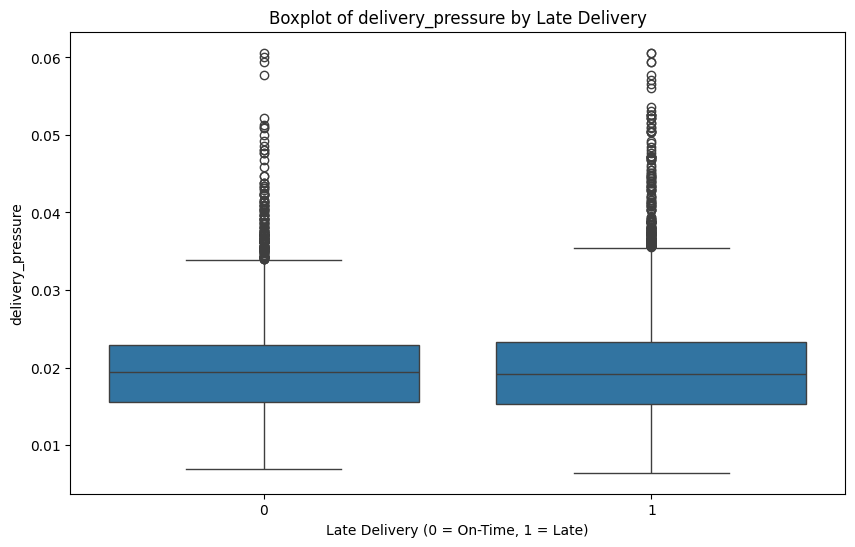

In [ ]:
# prompt: Boxplot of Feature by Late Delivery

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Recreate merged_df based on the previous steps in the notebook
# Load the E-Commerce dataset
ec = pd.read_csv('/content/ec.csv')
# Load the FMCG dataset
fmcg = pd.read_csv('/content/fmgc.csv')

# Outer Join on Cleaned Keys + Merge Key Creation (as in cell 0v_n639KueHg)
block_region_map = {
    'a': 'zone 1',
    'b': 'zone 2',
    'c': 'zone 3',
    'd': 'zone 4',
    'f': 'zone 5'
}

# Clean and map
ec['warehouseblock'] = ec['warehouseblock'].astype(str).str.strip().str.lower()
ec['region'] = ec['warehouseblock'].map(block_region_map)

# Also clean FMCG regions
fmcg['region'] = fmcg['region'].astype(str).str.strip().str.lower()

# Aggregate FMCG by region
fmcg_numeric_cols = fmcg.select_dtypes(include=np.number).columns.tolist()
fmcg_cols_to_agg = ['region'] + fmcg_numeric_cols
fmcg_for_agg = fmcg[fmcg_cols_to_agg]
fmcg_agg = fmcg_for_agg.groupby('region').mean().reset_index()

# Merge on region
merged_df = pd.merge(ec, fmcg_agg, on='region', how='left')

# Drop orderid column (as in cell ju2-wU0Jxntr)
if 'orderid' in merged_df.columns:
    merged_df = merged_df.drop('orderid', axis=1)

# Drop multicollinear columns (as in cell zCIJajzq6LnK)
cols_to_drop = [
    'storageissues',
    'govtchecks',
    'breakdowns',
    'floodproof',
    'estyear'
]
merged_df = merged_df.drop(columns=cols_to_drop)

# Create additional feature: delivery_pressure (as in cell V2g07vjSB3iD)
merged_df['delivery_pressure'] = merged_df['carecalls'] / (merged_df['productcost'] + 1)

# Select numerical features to plot
# Using the list of numerical features that were used for other visualizations
numerical_features_for_boxplot = [
    'productcost',
    'priorpurchases',
    'refillreq',
    'transportissues',
    'floodimpact',
    'hubdistance',
    'workers',
    'productweight',
    'delivery_pressure'
]

# Ensure these columns exist in merged_df
present_numerical_cols_boxplot = [col for col in numerical_features_for_boxplot if col in merged_df.columns]


if present_numerical_cols_boxplot:
    print("\nGenerating Boxplots for Numerical Features by Late Delivery:")

    # Plot a boxplot for each numerical column against the target variable
    for col in present_numerical_cols_boxplot:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='latedelivery', y=col, data=merged_df)
        plt.title(f'Boxplot of {col} by Late Delivery')
        plt.xlabel('Late Delivery (0 = On-Time, 1 = Late)')
        plt.ylabel(col)
        plt.show()
else:
    print("\nNo numerical columns found for boxplots.")

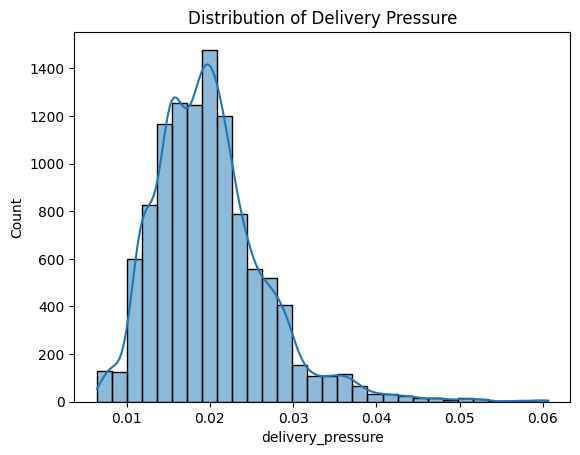

In [ ]:
sns.histplot(data=merged_df, x='delivery_pressure', bins=30, kde=True)
plt.title('Distribution of Delivery Pressure')
plt.show()


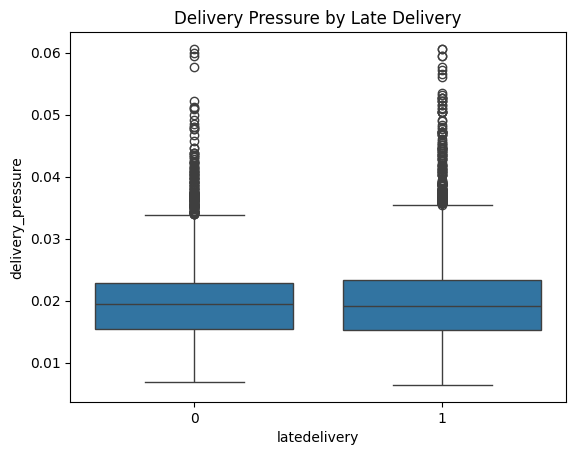

In [ ]:
sns.boxplot(x='latedelivery', y='delivery_pressure', data=merged_df)
plt.title('Delivery Pressure by Late Delivery')
plt.show()
